In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### preprocessing the data

In [7]:
# make above reading csv as a function
# read all the files in the directory ../human_eval_data_collection

# get the file name list first

def read_csv_files_in_directory(directory_path):
    # you should only add the csv files names in the directory
    file_names = os.listdir(directory_path)
    csv_files = [file for file in file_names if file.endswith(".csv")]
    return csv_files

def read_csv_file(file_name):
    return pd.read_csv(file_name)

def get_scenario_id(file_name):
    return file_name.split("scenario_")[1].split("_2025")[0]



In [9]:
file_list = []

for i in range (156):
    file_list.append(f"human_llm_eval_scenario_{i}_concat.csv")

for file in file_list:
    data = pd.read_csv(f"./processed_eval_data_step1/{file}")
    

golden answers for even number human_vs_llm is: B

golden answers for even number aligned_rating_misaligned_goal_human_response_comparison is: A

golden answers for even number aligned_goal_misaligned_rating_human_response_comparison is: B

golden answers for even number aligned_rating_misaligned_goal_llm_response_comparison is: A

golden answers for even number aligned_goal_misaligned_rating_llm_response_comparison is: A

for odd numbers:

it's: A B A B B

In [10]:
# adding one column to every file in file_list called "preferences"
# if i is even number, then for row 0, 5, 10, 15, if value of the "response" column is A, put "prefer LLM" in the "preferences" column, if value of the "response" column is B, put "prefer human" in the "preferences" column
# if i is odd number, then for row 0, 5, 10, 15, if value of the "response" column is A, put "prefer human" in the "preferences" column, if value of the "response" column is B, put "prefer LLM" in the "preferences" column

# if i is even number, then for row 1, 6, 11, 16, if value of the "response" column is A, put "expected goal human" in the "preference" column, if value of the "response" column is B, put "unexpected goal human" in the "preference" column
# if i is odd number, then for row 1, 6, 11, 16, if value of the "response" column is A, put "unexpected goal human" in the "preference" column, if value of the "response" column is B, put "expected goal human" in the "preference" column

# if i is even number, then for row 2, 7, 12, 17, if value of the "response" column is A, put "unexpected rating human" in the "preferences" column, if value of the "response" column is B, put "expected rating human" in the "preferences" column
# if i is odd number, then for row 2, 7, 12, 17, if value of the "response" column is A, put "expected rating human" in the "preferences" column, if value of the "response" column is B, put "unexpected rating human" in the "preferences" column

# if i is even number, then for row 3, 8, 13, 18, if value of the "response" column is A, put "expected goal LLM" in the "preferences" column, if value of the "response" column is B, put "unexpected goal LLM" in the "preferences" column
# if i is odd number, then for row 3, 8, 13, 18, if value of the "response" column is A, put "unexpected goal LLM" in the "preferences" column, if value of the "response" column is B, put "expected goal LLM" in the "preferences" column

# if i is even number, then for row 4, 9, 14, 19, if value of the "response" column is A, put "expected rating LLM" in the "preferences" column, if value of the "response" column is B, put "unexpected rating LLM" in the "preferences" column
# if i is odd number, then for row 4, 9, 14, 19, if value of the "response" column is A, put "unexpected rating LLM" in the "preferences" column, if value of the "response" column is B, put "expected rating LLM" in the "preferences" column

for i in range (156):
    data = pd.read_csv(f"./processed_eval_data_step1/human_llm_eval_scenario_{i}_concat.csv")
    # you should add a column called "preferences" to the data first and let all the values to be empty
    data["preferences"] = None
    if i % 2 == 0:
        # for 0, 5, 10, 15, if value of the "response" column is A, put "prefer LLM" in the "preferences" column, if value of the "response" column is B, put "prefer human" in the "preferences" column
        data.loc[0, "preferences"] = "prefer LLM" if data.loc[0, "response"] == "A" else "prefer human"
        data.loc[5, "preferences"] = "prefer LLM" if data.loc[5, "response"] == "A" else "prefer human"
        data.loc[10, "preferences"] = "prefer LLM" if data.loc[10, "response"] == "A" else "prefer human"
        data.loc[15, "preferences"] = "prefer LLM" if data.loc[15, "response"] == "A" else "prefer human"
        # for 1, 6, 11, 16, if value of the "response" column is A, put "expected goal human" in the "preference" column, if value of the "response" column is B, put "unexpected goal human" in the "preference" column
        data.loc[1, "preferences"] = "expected goal human" if data.loc[1, "response"] == "A" else "unexpected goal human"
        data.loc[6, "preferences"] = "expected goal human" if data.loc[6, "response"] == "A" else "unexpected goal human"
        data.loc[11, "preferences"] = "expected goal human" if data.loc[11, "response"] == "A" else "unexpected goal human"
        data.loc[16, "preferences"] = "expected goal human" if data.loc[16, "response"] == "A" else "unexpected goal human"
        # for 2, 7, 12, 17, if value of the "response" column is A, put "unexpected rating human" in the "preferences" column, if value of the "response" column is B, put "expected rating human" in the "preferences" column
        data.loc[2, "preferences"] = "unexpected rating human" if data.loc[2, "response"] == "A" else "expected rating human"
        data.loc[7, "preferences"] = "unexpected rating human" if data.loc[7, "response"] == "A" else "expected rating human"
        data.loc[12, "preferences"] = "unexpected rating human" if data.loc[12, "response"] == "A" else "expected rating human"
        data.loc[17, "preferences"] = "unexpected rating human" if data.loc[17, "response"] == "A" else "expected rating human"
        # for 3, 8, 13, 18, if value of the "response" column is A, put "expected goal LLM" in the "preferences" column, if value of the "response" column is B, put "unexpected goal LLM" in the "preferences" column
        data.loc[3, "preferences"] = "expected goal LLM" if data.loc[3, "response"] == "A" else "unexpected goal LLM"
        data.loc[8, "preferences"] = "expected goal LLM" if data.loc[8, "response"] == "A" else "unexpected goal LLM"
        data.loc[13, "preferences"] = "expected goal LLM" if data.loc[13, "response"] == "A" else "unexpected goal LLM"
        data.loc[18, "preferences"] = "expected goal LLM" if data.loc[18, "response"] == "A" else "unexpected goal LLM"
        # for 4, 9, 14, 19, if value of the "response" column is A, put "expected rating LLM" in the "preferences" column, if value of the "response" column is B, put "unexpected rating LLM" in the "preferences" column
        data.loc[4, "preferences"] = "expected rating LLM" if data.loc[4, "response"] == "A" else "unexpected rating LLM"
        data.loc[9, "preferences"] = "expected rating LLM" if data.loc[9, "response"] == "A" else "unexpected rating LLM"
        data.loc[14, "preferences"] = "expected rating LLM" if data.loc[14, "response"] == "A" else "unexpected rating LLM"
        data.loc[19, "preferences"] = "expected rating LLM" if data.loc[19, "response"] == "A" else "unexpected rating LLM"
    else:
        # for 0, 5, 10, 15, if value of the "response" column is A, put "prefer human" in the "preferences" column, if value of the "response" column is B, put "prefer LLM" in the "preferences" column
        data.loc[0, "preferences"] = "prefer human" if data.loc[0, "response"] == "A" else "prefer LLM"
        data.loc[5, "preferences"] = "prefer human" if data.loc[5, "response"] == "A" else "prefer LLM"
        data.loc[10, "preferences"] = "prefer human" if data.loc[10, "response"] == "A" else "prefer LLM"
        data.loc[15, "preferences"] = "prefer human" if data.loc[15, "response"] == "A" else "prefer LLM"
        # for 1, 6, 11, 16, if value of the "response" column is A, put "unexpected goal human" in the "preference" column, if value of the "response" column is B, put "expected goal human" in the "preference" column
        data.loc[1, "preferences"] = "unexpected goal human" if data.loc[1, "response"] == "A" else "expected goal human"
        data.loc[6, "preferences"] = "unexpected goal human" if data.loc[6, "response"] == "A" else "expected goal human"
        data.loc[11, "preferences"] = "unexpected goal human" if data.loc[11, "response"] == "A" else "expected goal human"
        data.loc[16, "preferences"] = "unexpected goal human" if data.loc[16, "response"] == "A" else "expected goal human"
        # for 2, 7, 12, 17, if value of the "response" column is A, put "expected rating human" in the "preferences" column, if value of the "response" column is B, put "unexpected rating human" in the "preferences" column
        data.loc[2, "preferences"] = "expected rating human" if data.loc[2, "response"] == "A" else "unexpected rating human"
        data.loc[7, "preferences"] = "expected rating human" if data.loc[7, "response"] == "A" else "unexpected rating human"
        data.loc[12, "preferences"] = "expected rating human" if data.loc[12, "response"] == "A" else "unexpected rating human"
        data.loc[17, "preferences"] = "expected rating human" if data.loc[17, "response"] == "A" else "unexpected rating human"
        # for 3, 8, 13, 18, if value of the "response" column is A, put "unexpected goal LLM" in the "preferences" column, if value of the "response" column is B, put "expected goal LLM" in the "preferences" column
        data.loc[3, "preferences"] = "unexpected goal LLM" if data.loc[3, "response"] == "A" else "expected goal LLM"
        data.loc[8, "preferences"] = "unexpected goal LLM" if data.loc[8, "response"] == "A" else "expected goal LLM"
        data.loc[13, "preferences"] = "unexpected goal LLM" if data.loc[13, "response"] == "A" else "expected goal LLM"
        data.loc[18, "preferences"] = "unexpected goal LLM" if data.loc[18, "response"] == "A" else "expected goal LLM"
        # for 4, 9, 14, 19, if value of the "response" column is A, put "unexpected rating LLM" in the "preferences" column, if value of the "response" column is B, put "expected rating LLM" in the "preferences" column
        data.loc[4, "preferences"] = "unexpected rating LLM" if data.loc[4, "response"] == "A" else "expected rating LLM"
        data.loc[9, "preferences"] = "unexpected rating LLM" if data.loc[9, "response"] == "A" else "expected rating LLM"
        data.loc[14, "preferences"] = "unexpected rating LLM" if data.loc[14, "response"] == "A" else "expected rating LLM"
        data.loc[19, "preferences"] = "unexpected rating LLM" if data.loc[19, "response"] == "A" else "expected rating LLM"

    # rename the file to human_llm_eval_scenario_{i}_concat_step2.csv and save them to the directory ./processed_eval_data_step2
    data.to_csv(f"./processed_eval_data_step2/human_llm_eval_scenario_{i}_concat_step2.csv", index=False)

In [11]:
# for all the data in the directory ./processed_eval_data_step2, you should concatenate them into one file called human_llm_eval_concat_step2.csv

file_list = []

for i in range (156):
    file_list.append(f"human_llm_eval_scenario_{i}_concat_step2.csv")

concat_dataframe = pd.DataFrame()

for file in file_list:
    data = pd.read_csv(f"./processed_eval_data_step2/{file}")
    concat_dataframe = pd.concat([concat_dataframe, data])

# concat_dataframe.to_csv("./processed_eval_data_step2/human_llm_eval_concat_step2.csv", index=False)

# you should reindex the data frame
concat_dataframe = concat_dataframe.reset_index(drop=True)
concat_dataframe

human_vs_llm_dataframe = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_dataframe = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_dataframe = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_dataframe = pd.DataFrame()  
aligned_goal_misaligned_rating_llm_response_dataframe = pd.DataFrame()


for file in file_list:
    data = pd.read_csv(f"./processed_eval_data_step2/{file}")

    human_vs_llm_dataframe = pd.concat([human_vs_llm_dataframe, data[data["preferences"].isin(["prefer human", "prefer LLM"])]])
    aligned_rating_misaligned_goal_human_response_dataframe = pd.concat([aligned_rating_misaligned_goal_human_response_dataframe, data[data["preferences"].isin(["expected goal human", "unexpected goal human"])]])
    aligned_goal_misaligned_rating_human_response_dataframe = pd.concat([aligned_goal_misaligned_rating_human_response_dataframe, data[data["preferences"].isin(["expected rating human", "unexpected rating human"])]])
    aligned_rating_misaligned_goal_llm_response_dataframe = pd.concat([aligned_rating_misaligned_goal_llm_response_dataframe, data[data["preferences"].isin(["expected goal LLM", "unexpected goal LLM"])]])
    aligned_goal_misaligned_rating_llm_response_dataframe = pd.concat([aligned_goal_misaligned_rating_llm_response_dataframe, data[data["preferences"].isin(["expected rating LLM", "unexpected rating LLM"])]])
                                       

human_vs_llm_dataframe.to_csv("./processed_eval_data_step3/human_vs_llm_dataframe.csv", index=False)
aligned_rating_misaligned_goal_human_response_dataframe.to_csv("./processed_eval_data_step3/aligned_rating_misaligned_goal_human_response_dataframe.csv", index=False)
aligned_goal_misaligned_rating_human_response_dataframe.to_csv("./processed_eval_data_step3/aligned_goal_misaligned_rating_human_response_dataframe.csv", index=False)
aligned_rating_misaligned_goal_llm_response_dataframe.to_csv("./processed_eval_data_step3/aligned_rating_misaligned_goal_llm_response_dataframe.csv", index=False)
aligned_goal_misaligned_rating_llm_response_dataframe.to_csv("./processed_eval_data_step3/aligned_goal_misaligned_rating_llm_response_dataframe.csv", index=False)
concat_dataframe.to_csv("./processed_eval_data_step3/whole_response_dataframe.csv", index=False)

### the overall stats for 5 different groups of responses considered

In [12]:


# for all the files in the ./processed_eval_data_step1
# you should extract the scenario_id between the text "scenario_" and "_concat"
# and convert the scenario_id to an integer
# and you should do the even and odd split for all the files

# get the file name list first

file_name_list = read_csv_files_in_directory("./processed_eval_data_step1")

# file_name_list = file_name_list[7:9]

file_name_path = "./processed_eval_data_step1/"

# if scenario_id is even, then generate the even list
# if scenario_id is odd, then generate the odd list

even_scenario_id_list = [int(file_name.split("scenario_")[1].split("_concat")[0]) for file_name in file_name_list if int(file_name.split("scenario_")[1].split("_concat")[0]) % 2 == 0]

odd_scenario_id_list = [int(file_name.split("scenario_")[1].split("_concat")[0]) for file_name in file_name_list if int(file_name.split("scenario_")[1].split("_concat")[0]) % 2 != 0]

# you should do all above steps for all the files in the ./processed_eval_data_step1

# make a dict to store human_vs_llm_responses_even_dict
human_vs_llm_responses_even_store_dict = {}

# make a dict to store human_vs_llm_responses_odd_dict
human_vs_llm_responses_odd_store_dict = {}

# make a dict to store aligned_rating_misaligned_goal_human_response_comparison_even_dict

aligned_rating_misaligned_goal_human_response_comparison_even_store_dict = {}

# make a dict to store aligned_rating_misaligned_goal_human_response_comparison_odd_dict

aligned_rating_misaligned_goal_human_response_comparison_odd_store_dict = {}

# make a dict to store aligned_goal_misaligned_rating_human_response_comparison_even_dict

aligned_goal_misaligned_rating_human_response_comparison_even_store_dict = {}

# make a dict to store aligned_goal_misaligned_rating_human_response_comparison_odd_dict

aligned_goal_misaligned_rating_human_response_comparison_odd_store_dict = {}

# make a dict to store aligned_rating_misaligned_goal_llm_response_comparison_even_dict

aligned_rating_misaligned_goal_llm_response_comparison_even_store_dict = {}

# make a dict to store aligned_rating_misaligned_goal_llm_response_comparison_odd_dict

aligned_rating_misaligned_goal_llm_response_comparison_odd_store_dict = {}

# make a dict to store aligned_goal_misaligned_rating_llm_response_comparison_even_dict

aligned_goal_misaligned_rating_llm_response_comparison_even_store_dict = {}

# make a dict to store aligned_goal_misaligned_rating_llm_response_comparison_odd_dict

aligned_goal_misaligned_rating_llm_response_comparison_odd_store_dict = {}

for file_name in file_name_list:
    # get the scenario_id
    scenario_id = int(file_name.split("scenario_")[1].split("_concat")[0])
    # read the file
    concatenated_data = pd.read_csv(f"{file_name_path}{file_name}")

    # if scenario_id in even_scenario_id_list, then do all the even stuff

    if scenario_id in even_scenario_id_list:
        human_vs_llm_responses_even = concatenated_data.iloc[[0, 5, 10, 15]]
        aligned_rating_misaligned_goal_human_response_comparison_even = concatenated_data.iloc[[1, 6, 11, 16]]
        aligned_goal_misaligned_rating_human_response_comparison_even = concatenated_data.iloc[[2, 7, 12, 17]]
        aligned_rating_misaligned_goal_llm_response_comparison_even = concatenated_data.iloc[[3, 8, 13, 18]]
        aligned_goal_misaligned_rating_llm_response_comparison_even = concatenated_data.iloc[[4, 9, 14, 19]]
        human_vs_llm_responses_even_response_frequency = human_vs_llm_responses_even['response'].value_counts()
        aligned_rating_misaligned_goal_human_response_comparison_even_response_frequency = aligned_rating_misaligned_goal_human_response_comparison_even['response'].value_counts()
        aligned_goal_misaligned_rating_human_response_comparison_even_response_frequency = aligned_goal_misaligned_rating_human_response_comparison_even['response'].value_counts()
        aligned_rating_misaligned_goal_llm_response_comparison_even_response_frequency = aligned_rating_misaligned_goal_llm_response_comparison_even['response'].value_counts()
        aligned_goal_misaligned_rating_llm_response_comparison_even_response_frequency = aligned_goal_misaligned_rating_llm_response_comparison_even['response'].value_counts()
        human_vs_llm_responses_even_response_frequency_dict = human_vs_llm_responses_even_response_frequency.to_dict()
        aligned_rating_misaligned_goal_human_response_comparison_even_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_response_frequency.to_dict()
        aligned_goal_misaligned_rating_human_response_comparison_even_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_response_frequency.to_dict()
        aligned_rating_misaligned_goal_llm_response_comparison_even_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_response_frequency.to_dict()
        aligned_goal_misaligned_rating_llm_response_comparison_even_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_response_frequency.to_dict()

        # store the data in the dict
        human_vs_llm_responses_even_store_dict[scenario_id] = human_vs_llm_responses_even_response_frequency_dict
        aligned_rating_misaligned_goal_human_response_comparison_even_store_dict[scenario_id] = aligned_rating_misaligned_goal_human_response_comparison_even_response_frequency_dict
        aligned_goal_misaligned_rating_human_response_comparison_even_store_dict[scenario_id] = aligned_goal_misaligned_rating_human_response_comparison_even_response_frequency_dict
        aligned_rating_misaligned_goal_llm_response_comparison_even_store_dict[scenario_id] = aligned_rating_misaligned_goal_llm_response_comparison_even_response_frequency_dict
        aligned_goal_misaligned_rating_llm_response_comparison_even_store_dict[scenario_id] = aligned_goal_misaligned_rating_llm_response_comparison_even_response_frequency_dict

    # if scenario_id in odd_scenario_id_list, then do all the odd stuff
        
    if scenario_id in odd_scenario_id_list:
        human_vs_llm_responses_odd = concatenated_data.iloc[[0, 5, 10, 15]]
        aligned_rating_misaligned_goal_human_response_comparison_odd = concatenated_data.iloc[[1, 6, 11, 16]]
        aligned_goal_misaligned_rating_human_response_comparison_odd = concatenated_data.iloc[[2, 7, 12, 17]]
        aligned_rating_misaligned_goal_llm_response_comparison_odd = concatenated_data.iloc[[3, 8, 13, 18]]
        aligned_goal_misaligned_rating_llm_response_comparison_odd = concatenated_data.iloc[[4, 9, 14, 19]]
        human_vs_llm_responses_odd_response_frequency = human_vs_llm_responses_odd['response'].value_counts()
        aligned_rating_misaligned_goal_human_response_comparison_odd_response_frequency = aligned_rating_misaligned_goal_human_response_comparison_odd['response'].value_counts()
        aligned_goal_misaligned_rating_human_response_comparison_odd_response_frequency = aligned_goal_misaligned_rating_human_response_comparison_odd['response'].value_counts()
        aligned_rating_misaligned_goal_llm_response_comparison_odd_response_frequency = aligned_rating_misaligned_goal_llm_response_comparison_odd['response'].value_counts()
        aligned_goal_misaligned_rating_llm_response_comparison_odd_response_frequency = aligned_goal_misaligned_rating_llm_response_comparison_odd['response'].value_counts()
        human_vs_llm_responses_odd_response_frequency_dict = human_vs_llm_responses_odd_response_frequency.to_dict()
        aligned_rating_misaligned_goal_human_response_comparison_odd_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_response_frequency.to_dict()
        aligned_goal_misaligned_rating_human_response_comparison_odd_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_response_frequency.to_dict()
        aligned_rating_misaligned_goal_llm_response_comparison_odd_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_response_frequency.to_dict()
        aligned_goal_misaligned_rating_llm_response_comparison_odd_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_response_frequency.to_dict()

        # store the data in the dict
        human_vs_llm_responses_odd_store_dict[scenario_id] = human_vs_llm_responses_odd_response_frequency_dict
        aligned_rating_misaligned_goal_human_response_comparison_odd_store_dict[scenario_id] = aligned_rating_misaligned_goal_human_response_comparison_odd_response_frequency_dict
        aligned_goal_misaligned_rating_human_response_comparison_odd_store_dict[scenario_id] = aligned_goal_misaligned_rating_human_response_comparison_odd_response_frequency_dict
        aligned_rating_misaligned_goal_llm_response_comparison_odd_store_dict[scenario_id] = aligned_rating_misaligned_goal_llm_response_comparison_odd_response_frequency_dict
        aligned_goal_misaligned_rating_llm_response_comparison_odd_store_dict[scenario_id] = aligned_goal_misaligned_rating_llm_response_comparison_odd_response_frequency_dict

    

        

In [13]:
def count_A_B_frequency(data_dict):
    A_count = 0
    B_count = 0
    for key, value in data_dict.items():
        if "A" in value:
            A_count += value["A"]
        if "B" in value:
            B_count += value["B"]
    return {"A": A_count, "B": B_count}


In [14]:
# BABAA, ABABB

count_A_B_frequency(human_vs_llm_responses_even_store_dict), count_A_B_frequency(human_vs_llm_responses_odd_store_dict)

human_preferences_even = count_A_B_frequency(human_vs_llm_responses_even_store_dict)['B']
human_preferences_add = count_A_B_frequency(human_vs_llm_responses_odd_store_dict)['A']

llm_preferences_even = count_A_B_frequency(human_vs_llm_responses_even_store_dict)['A']
llm_preferences_add = count_A_B_frequency(human_vs_llm_responses_odd_store_dict)['B']

human_preferences = count_A_B_frequency(human_vs_llm_responses_even_store_dict)['B'] + count_A_B_frequency(human_vs_llm_responses_odd_store_dict)['A']
llm_preferences = count_A_B_frequency(human_vs_llm_responses_even_store_dict)['A'] + count_A_B_frequency(human_vs_llm_responses_odd_store_dict)['B']

human_preferences, llm_preferences

(215, 409)

In [15]:
human_preferences / (human_preferences + llm_preferences), llm_preferences / (human_preferences + llm_preferences)

(0.34455128205128205, 0.655448717948718)

In [16]:
human_preferences / (human_preferences + llm_preferences) - llm_preferences / (human_preferences + llm_preferences)

-0.3108974358974359

In [18]:
count_A_B_frequency(aligned_rating_misaligned_goal_human_response_comparison_even_store_dict), count_A_B_frequency(aligned_rating_misaligned_goal_human_response_comparison_odd_store_dict)

expected_aligned_rating_misaligned_goal_human_response_comparison = count_A_B_frequency(aligned_rating_misaligned_goal_human_response_comparison_even_store_dict)['A'] + count_A_B_frequency(aligned_rating_misaligned_goal_human_response_comparison_odd_store_dict)['B']

unexpected_aligned_rating_misaligned_goal_human_response_comparison = count_A_B_frequency(aligned_rating_misaligned_goal_human_response_comparison_even_store_dict)['B'] + count_A_B_frequency(aligned_rating_misaligned_goal_human_response_comparison_odd_store_dict)['A']

expected_aligned_rating_misaligned_goal_human_response_comparison, unexpected_aligned_rating_misaligned_goal_human_response_comparison

expected_aligned_rating_misaligned_goal_human_response_comparison / (expected_aligned_rating_misaligned_goal_human_response_comparison + unexpected_aligned_rating_misaligned_goal_human_response_comparison), unexpected_aligned_rating_misaligned_goal_human_response_comparison / (expected_aligned_rating_misaligned_goal_human_response_comparison + unexpected_aligned_rating_misaligned_goal_human_response_comparison)

(0.6586538461538461, 0.34134615384615385)

In [20]:
expected_aligned_rating_misaligned_goal_human_response_comparison / (expected_aligned_rating_misaligned_goal_human_response_comparison + unexpected_aligned_rating_misaligned_goal_human_response_comparison) - unexpected_aligned_rating_misaligned_goal_human_response_comparison / (expected_aligned_rating_misaligned_goal_human_response_comparison + unexpected_aligned_rating_misaligned_goal_human_response_comparison)

0.3173076923076923

In [21]:
count_A_B_frequency(aligned_goal_misaligned_rating_human_response_comparison_even_store_dict), count_A_B_frequency(aligned_goal_misaligned_rating_human_response_comparison_odd_store_dict)

expected_aligned_goal_misaligned_rating_human_response_comparison = count_A_B_frequency(aligned_goal_misaligned_rating_human_response_comparison_even_store_dict)['B'] + count_A_B_frequency(aligned_goal_misaligned_rating_human_response_comparison_odd_store_dict)['A']

unexpected_aligned_goal_misaligned_rating_human_response_comparison = count_A_B_frequency(aligned_goal_misaligned_rating_human_response_comparison_even_store_dict)['A'] + count_A_B_frequency(aligned_goal_misaligned_rating_human_response_comparison_odd_store_dict)['B']

expected_aligned_goal_misaligned_rating_human_response_comparison, unexpected_aligned_goal_misaligned_rating_human_response_comparison

expected_aligned_goal_misaligned_rating_human_response_comparison / (expected_aligned_goal_misaligned_rating_human_response_comparison + unexpected_aligned_goal_misaligned_rating_human_response_comparison), unexpected_aligned_goal_misaligned_rating_human_response_comparison / (expected_aligned_goal_misaligned_rating_human_response_comparison + unexpected_aligned_goal_misaligned_rating_human_response_comparison)

(0.7083333333333334, 0.2916666666666667)

In [23]:
# llm dict
count_A_B_frequency(aligned_rating_misaligned_goal_llm_response_comparison_even_store_dict), count_A_B_frequency(aligned_rating_misaligned_goal_llm_response_comparison_odd_store_dict)

expected_aligned_rating_misaligned_goal_llm_response_comparison = count_A_B_frequency(aligned_rating_misaligned_goal_llm_response_comparison_even_store_dict)['A'] + count_A_B_frequency(aligned_rating_misaligned_goal_llm_response_comparison_odd_store_dict)['B']

unexpected_aligned_rating_misaligned_goal_llm_response_comparison = count_A_B_frequency(aligned_rating_misaligned_goal_llm_response_comparison_even_store_dict)['B'] + count_A_B_frequency(aligned_rating_misaligned_goal_llm_response_comparison_odd_store_dict)['A']

expected_aligned_rating_misaligned_goal_llm_response_comparison, unexpected_aligned_rating_misaligned_goal_llm_response_comparison

expected_aligned_rating_misaligned_goal_llm_response_comparison / (expected_aligned_rating_misaligned_goal_llm_response_comparison + unexpected_aligned_rating_misaligned_goal_llm_response_comparison), unexpected_aligned_rating_misaligned_goal_llm_response_comparison / (expected_aligned_rating_misaligned_goal_llm_response_comparison + unexpected_aligned_rating_misaligned_goal_llm_response_comparison)

(0.75, 0.25)

In [24]:
expected_aligned_rating_misaligned_goal_llm_response_comparison / (expected_aligned_rating_misaligned_goal_llm_response_comparison + unexpected_aligned_rating_misaligned_goal_llm_response_comparison)- unexpected_aligned_rating_misaligned_goal_llm_response_comparison / (expected_aligned_rating_misaligned_goal_llm_response_comparison + unexpected_aligned_rating_misaligned_goal_llm_response_comparison)

0.5

In [25]:
count_A_B_frequency(aligned_goal_misaligned_rating_llm_response_comparison_even_store_dict), count_A_B_frequency(aligned_goal_misaligned_rating_llm_response_comparison_odd_store_dict)

expected_aligned_goal_misaligned_rating_llm_response_comparison = count_A_B_frequency(aligned_goal_misaligned_rating_llm_response_comparison_even_store_dict)['A'] + count_A_B_frequency(aligned_goal_misaligned_rating_llm_response_comparison_odd_store_dict)['B']

unexpected_aligned_goal_misaligned_rating_llm_response_comparison = count_A_B_frequency(aligned_goal_misaligned_rating_llm_response_comparison_even_store_dict)['B'] + count_A_B_frequency(aligned_goal_misaligned_rating_llm_response_comparison_odd_store_dict)['A']

expected_aligned_goal_misaligned_rating_llm_response_comparison, unexpected_aligned_goal_misaligned_rating_llm_response_comparison

expected_aligned_goal_misaligned_rating_llm_response_comparison / (expected_aligned_goal_misaligned_rating_llm_response_comparison + unexpected_aligned_goal_misaligned_rating_llm_response_comparison), unexpected_aligned_goal_misaligned_rating_llm_response_comparison / (expected_aligned_goal_misaligned_rating_llm_response_comparison + unexpected_aligned_goal_misaligned_rating_llm_response_comparison)

(0.7612179487179487, 0.2387820512820513)

In [26]:
0.2387820512820513-0.5

-0.2612179487179487

golden answers for even number human_vs_llm is: B

golden answers for even number aligned_rating_misaligned_goal_human_response_comparison is: A

golden answers for even number aligned_goal_misaligned_rating_human_response_comparison is: B

golden answers for even number aligned_rating_misaligned_goal_llm_response_comparison is: A

golden answers for even number aligned_goal_misaligned_rating_llm_response_comparison is: A

for odd numbers:

it's: A B A B B

0 out of 3 hearts

1 out of 3 hearts

2 out of 3 hearts

3 out of 3 hearts

If .*? wanted to BOTH make .*? feel good AND give accurate and informative feedback,

If .*? wanted to make .*? feel good, but not necessarily give informative feedback

If .*? wanted to give as accurate and informative feedback as possible, but not necessarily make .*? feel good.

### counting preference over goals and ratings for different groups of responses

In [27]:
# create an empty pd.DataFrame called human_vs_llm_responses_even_o_out_of_3_hearts
human_vs_llm_responses_even_0_out_of_3_hearts = pd.DataFrame()
human_vs_llm_responses_even_1_out_of_3_hearts = pd.DataFrame()
human_vs_llm_responses_even_2_out_of_3_hearts = pd.DataFrame()
human_vs_llm_responses_even_3_out_of_3_hearts = pd.DataFrame()

human_vs_llm_responses_odd_0_out_of_3_hearts = pd.DataFrame()
human_vs_llm_responses_odd_1_out_of_3_hearts = pd.DataFrame()
human_vs_llm_responses_odd_2_out_of_3_hearts = pd.DataFrame()
human_vs_llm_responses_odd_3_out_of_3_hearts = pd.DataFrame()

aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts = pd.DataFrame()

aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts = pd.DataFrame()

aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts = pd.DataFrame()

aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts = pd.DataFrame()

aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts = pd.DataFrame()

aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts = pd.DataFrame()

aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts = pd.DataFrame()

aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts = pd.DataFrame()

In [28]:
file_name_list = read_csv_files_in_directory("./processed_eval_data_step1")

file_name_path = "./processed_eval_data_step1/"

even_scenario_id_list = [int(file_name.split("scenario_")[1].split("_concat")[0]) for file_name in file_name_list if int(file_name.split("scenario_")[1].split("_concat")[0]) % 2 == 0]

odd_scenario_id_list = [int(file_name.split("scenario_")[1].split("_concat")[0]) for file_name in file_name_list if int(file_name.split("scenario_")[1].split("_concat")[0]) % 2 != 0]

for file_name in file_name_list:
    scenario_id = int(file_name.split("scenario_")[1].split("_concat")[0])
    # read the file
    concatenated_data = pd.read_csv(f"{file_name_path}{file_name}")

    

    if scenario_id in even_scenario_id_list:
        human_vs_llm_responses_even = concatenated_data.iloc[[0, 5, 10, 15]]
        aligned_rating_misaligned_goal_human_response_comparison_even = concatenated_data.iloc[[1, 6, 11, 16]]
        aligned_goal_misaligned_rating_human_response_comparison_even = concatenated_data.iloc[[2, 7, 12, 17]]
        aligned_rating_misaligned_goal_llm_response_comparison_even = concatenated_data.iloc[[3, 8, 13, 18]]
        aligned_goal_misaligned_rating_llm_response_comparison_even = concatenated_data.iloc[[4, 9, 14, 19]]

        # check the stimulus column of human_vs_llm_responses_even, aligned_rating_misaligned_goal_human_response_comparison_even, aligned_goal_misaligned_rating_human_response_comparison_even, aligned_rating_misaligned_goal_llm_response_comparison_even, aligned_goal_misaligned_rating_llm_response_comparison_even
        # if there is "0 out of 3 hearts" in the stimulus column of human_vs_llm_responses_even, then you should concat that row to the human_vs_llm_responses_even_0_out_of_3_hearts dataframe

        human_vs_llm_responses_even_0_out_of_3_hearts = pd.concat([human_vs_llm_responses_even_0_out_of_3_hearts, human_vs_llm_responses_even[human_vs_llm_responses_even['stimulus'].str.contains("0 out of 3 hearts")]])
        human_vs_llm_responses_even_1_out_of_3_hearts = pd.concat([human_vs_llm_responses_even_1_out_of_3_hearts, human_vs_llm_responses_even[human_vs_llm_responses_even['stimulus'].str.contains("1 out of 3 hearts")]])
        human_vs_llm_responses_even_2_out_of_3_hearts = pd.concat([human_vs_llm_responses_even_2_out_of_3_hearts, human_vs_llm_responses_even[human_vs_llm_responses_even['stimulus'].str.contains("2 out of 3 hearts")]])
        human_vs_llm_responses_even_3_out_of_3_hearts = pd.concat([human_vs_llm_responses_even_3_out_of_3_hearts, human_vs_llm_responses_even[human_vs_llm_responses_even['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_even[aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_even[aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_even[aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_even[aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_even[aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_even[aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_even[aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_even[aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_even[aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_even[aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_even[aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_even[aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_even[aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_even[aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_even[aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_even[aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("3 out of 3 hearts")]])


    if scenario_id in odd_scenario_id_list:
        human_vs_llm_responses_odd = concatenated_data.iloc[[0, 5, 10, 15]]
        aligned_rating_misaligned_goal_human_response_comparison_odd = concatenated_data.iloc[[1, 6, 11, 16]]
        aligned_goal_misaligned_rating_human_response_comparison_odd = concatenated_data.iloc[[2, 7, 12, 17]]
        aligned_rating_misaligned_goal_llm_response_comparison_odd = concatenated_data.iloc[[3, 8, 13, 18]]
        aligned_goal_misaligned_rating_llm_response_comparison_odd = concatenated_data.iloc[[4, 9, 14, 19]]

        # check the stimulus column of human_vs_llm_responses_odd, aligned_rating_misaligned_goal_human_response_comparison_odd, aligned_goal_misaligned_rating_human_response_comparison_odd, aligned_rating_misaligned_goal_llm_response_comparison_odd, aligned_goal_misaligned_rating_llm_response_comparison_odd
        # if there is "0 out of 3 hearts" in the stimulus column of human_vs_llm_responses_odd, then you should concat that row to the human_vs_llm_responses_odd_0_out_of_3_hearts dataframe

        human_vs_llm_responses_odd_0_out_of_3_hearts = pd.concat([human_vs_llm_responses_odd_0_out_of_3_hearts, human_vs_llm_responses_odd[human_vs_llm_responses_odd['stimulus'].str.contains("0 out of 3 hearts")]])
        human_vs_llm_responses_odd_1_out_of_3_hearts = pd.concat([human_vs_llm_responses_odd_1_out_of_3_hearts, human_vs_llm_responses_odd[human_vs_llm_responses_odd['stimulus'].str.contains("1 out of 3 hearts")]])
        human_vs_llm_responses_odd_2_out_of_3_hearts = pd.concat([human_vs_llm_responses_odd_2_out_of_3_hearts, human_vs_llm_responses_odd[human_vs_llm_responses_odd['stimulus'].str.contains("2 out of 3 hearts")]])
        human_vs_llm_responses_odd_3_out_of_3_hearts = pd.concat([human_vs_llm_responses_odd_3_out_of_3_hearts, human_vs_llm_responses_odd[human_vs_llm_responses_odd['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_odd[aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_odd[aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_odd[aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts, aligned_rating_misaligned_goal_human_response_comparison_odd[aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_odd[aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_odd[aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_odd[aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts, aligned_goal_misaligned_rating_human_response_comparison_odd[aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_odd[aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_odd[aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_odd[aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts, aligned_rating_misaligned_goal_llm_response_comparison_odd[aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("3 out of 3 hearts")]])

        aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_odd[aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("0 out of 3 hearts")]])
        aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_odd[aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("1 out of 3 hearts")]])
        aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_odd[aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("2 out of 3 hearts")]])
        aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts, aligned_goal_misaligned_rating_llm_response_comparison_odd[aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("3 out of 3 hearts")]])



In [29]:
# now you should count the number of A and B in the above dataframes

# and save as a dict with keys are A and B, value is frequency
# 0 out of 3 hearts
human_vs_llm_responses_even_0_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_even_0_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_even_0_out_of_3_hearts['response'].value_counts().to_dict()

human_vs_llm_responses_odd_0_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_odd_0_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_odd_0_out_of_3_hearts['response'].value_counts().to_dict()

human_preference_0_out_of_3_hearts_response = human_vs_llm_responses_even_0_out_of_3_hearts_response_frequency_dict['B'] + human_vs_llm_responses_odd_0_out_of_3_hearts_response_frequency_dict['A']
llm_preference_0_out_of_3_hearts_response = human_vs_llm_responses_even_0_out_of_3_hearts_response_frequency_dict['A'] + human_vs_llm_responses_odd_0_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_0_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_0_out_of_3_hearts_response_frequency_dict['A']

# 1 out of 3 hearts
human_vs_llm_responses_even_1_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_even_1_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_even_1_out_of_3_hearts['response'].value_counts().to_dict()

human_vs_llm_responses_odd_1_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_odd_1_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_odd_1_out_of_3_hearts['response'].value_counts().to_dict()

human_preference_1_out_of_3_hearts_response = human_vs_llm_responses_even_1_out_of_3_hearts_response_frequency_dict['B'] + human_vs_llm_responses_odd_1_out_of_3_hearts_response_frequency_dict['A']
llm_preference_1_out_of_3_hearts_response = human_vs_llm_responses_even_1_out_of_3_hearts_response_frequency_dict['A'] + human_vs_llm_responses_odd_1_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_1_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_1_out_of_3_hearts_response_frequency_dict['A']

# 2 out of 3 hearts
human_vs_llm_responses_even_2_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_even_2_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_even_2_out_of_3_hearts['response'].value_counts().to_dict()

human_vs_llm_responses_odd_2_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_odd_2_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_odd_2_out_of_3_hearts['response'].value_counts().to_dict()

human_preference_2_out_of_3_hearts_response = human_vs_llm_responses_even_2_out_of_3_hearts_response_frequency_dict['B'] + human_vs_llm_responses_odd_2_out_of_3_hearts_response_frequency_dict['A']
llm_preference_2_out_of_3_hearts_response = human_vs_llm_responses_even_2_out_of_3_hearts_response_frequency_dict['A'] + human_vs_llm_responses_odd_2_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_2_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_2_out_of_3_hearts_response_frequency_dict['A']

# 3 out of 3 hearts
human_vs_llm_responses_even_3_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_even_3_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_even_3_out_of_3_hearts['response'].value_counts().to_dict()

human_vs_llm_responses_odd_3_out_of_3_hearts_response_frequency_dict = {}
human_vs_llm_responses_odd_3_out_of_3_hearts_response_frequency_dict = human_vs_llm_responses_odd_3_out_of_3_hearts['response'].value_counts().to_dict()

human_preference_3_out_of_3_hearts_response = human_vs_llm_responses_even_3_out_of_3_hearts_response_frequency_dict['B'] + human_vs_llm_responses_odd_3_out_of_3_hearts_response_frequency_dict['A']
llm_preference_3_out_of_3_hearts_response = human_vs_llm_responses_even_3_out_of_3_hearts_response_frequency_dict['A'] + human_vs_llm_responses_odd_3_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts = aligned_rating_misaligned_goal_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts = aligned_goal_misaligned_rating_human_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts = aligned_rating_misaligned_goal_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts = aligned_goal_misaligned_rating_llm_response_comparison_even_3_out_of_3_hearts_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_3_out_of_3_hearts_response_frequency_dict['A']

In [30]:
human_preference_0_out_of_3_hearts_response_percentage = round(human_preference_0_out_of_3_hearts_response / (human_preference_0_out_of_3_hearts_response + llm_preference_0_out_of_3_hearts_response) * 100, 2)
llm_preference_0_out_of_3_hearts_response_percentage = round(llm_preference_0_out_of_3_hearts_response / (human_preference_0_out_of_3_hearts_response + llm_preference_0_out_of_3_hearts_response) * 100,  2)
human_preference_1_out_of_3_hearts_response_percentage = round(human_preference_1_out_of_3_hearts_response / (human_preference_1_out_of_3_hearts_response + llm_preference_1_out_of_3_hearts_response) * 100, 2)
llm_preference_1_out_of_3_hearts_response_percentage = round(llm_preference_1_out_of_3_hearts_response / (human_preference_1_out_of_3_hearts_response + llm_preference_1_out_of_3_hearts_response) * 100,  2)
human_preference_2_out_of_3_hearts_response_percentage = round(human_preference_2_out_of_3_hearts_response / (human_preference_2_out_of_3_hearts_response + llm_preference_2_out_of_3_hearts_response) * 100, 2)
llm_preference_2_out_of_3_hearts_response_percentage = round(llm_preference_2_out_of_3_hearts_response / (human_preference_2_out_of_3_hearts_response + llm_preference_2_out_of_3_hearts_response) * 100,  2)
human_preference_3_out_of_3_hearts_response_percentage = round(human_preference_3_out_of_3_hearts_response / (human_preference_3_out_of_3_hearts_response + llm_preference_3_out_of_3_hearts_response) * 100, 2)
llm_preference_3_out_of_3_hearts_response_percentage = round(llm_preference_3_out_of_3_hearts_response / (human_preference_3_out_of_3_hearts_response + llm_preference_3_out_of_3_hearts_response) * 100,  2)

# make two lists of human and llm preference
human_preference_with_respect_to_ratings_list = [human_preference_0_out_of_3_hearts_response_percentage, human_preference_1_out_of_3_hearts_response_percentage, human_preference_2_out_of_3_hearts_response_percentage, human_preference_3_out_of_3_hearts_response_percentage]
llm_preference_with_respect_to_ratings_list = [llm_preference_0_out_of_3_hearts_response_percentage, llm_preference_1_out_of_3_hearts_response_percentage, llm_preference_2_out_of_3_hearts_response_percentage, llm_preference_3_out_of_3_hearts_response_percentage]

expected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts) * 100, 2)
expected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts) * 100, 2)
expected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts) * 100, 2)
expected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts) * 100, 2)

expected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_ratings_list = [expected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts_percentage, expected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts_percentage, expected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts_percentage, expected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts_percentage]
unexpected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_ratings_list = [unexpected_aligned_rating_misaligned_goal_human_response_comparison_0_out_of_3_hearts_percentage, unexpected_aligned_rating_misaligned_goal_human_response_comparison_1_out_of_3_hearts_percentage, unexpected_aligned_rating_misaligned_goal_human_response_comparison_2_out_of_3_hearts_percentage, unexpected_aligned_rating_misaligned_goal_human_response_comparison_3_out_of_3_hearts_percentage]

expected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts) * 100, 2)
expected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts) * 100, 2)
expected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts) * 100, 2)
expected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts) * 100, 2)

expected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_ratings_list = [expected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts_percentage, expected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts_percentage, expected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts_percentage, expected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts_percentage]
unexpected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_ratings_list = [unexpected_aligned_goal_misaligned_rating_human_response_comparison_0_out_of_3_hearts_percentage, unexpected_aligned_goal_misaligned_rating_human_response_comparison_1_out_of_3_hearts_percentage, unexpected_aligned_goal_misaligned_rating_human_response_comparison_2_out_of_3_hearts_percentage, unexpected_aligned_goal_misaligned_rating_human_response_comparison_3_out_of_3_hearts_percentage]

expected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts) * 100, 2)
expected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts) * 100, 2)
expected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts) * 100, 2)
expected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts / (expected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts) * 100, 2)

expected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_ratings_list = [expected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts_percentage, expected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts_percentage, expected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts_percentage, expected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts_percentage]
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_ratings_list = [unexpected_aligned_rating_misaligned_goal_llm_response_comparison_0_out_of_3_hearts_percentage, unexpected_aligned_rating_misaligned_goal_llm_response_comparison_1_out_of_3_hearts_percentage, unexpected_aligned_rating_misaligned_goal_llm_response_comparison_2_out_of_3_hearts_percentage, unexpected_aligned_rating_misaligned_goal_llm_response_comparison_3_out_of_3_hearts_percentage]

expected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts) * 100, 2)
expected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts) * 100, 2)
expected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts) * 100, 2)
expected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts / (expected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts) * 100, 2)

expected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_ratings_list = [expected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts_percentage, expected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts_percentage, expected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts_percentage, expected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts_percentage]
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_ratings_list = [unexpected_aligned_goal_misaligned_rating_llm_response_comparison_0_out_of_3_hearts_percentage, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_1_out_of_3_hearts_percentage, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_2_out_of_3_hearts_percentage, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_3_out_of_3_hearts_percentage]

In [34]:
# create an empty pd.DataFrame called human_vs_llm_responses_even_both_goal
human_vs_llm_responses_even_both_goal = pd.DataFrame()

# create an empty pd.DataFrame called human_vs_llm_responses_even_social_goal
human_vs_llm_responses_even_social_goal = pd.DataFrame()

# create an empty pd.DataFrame called human_vs_llm_responses_even_informative_goal
human_vs_llm_responses_even_informative_goal = pd.DataFrame()

# create an empty pd.DataFrame called human_vs_llm_responses_even_default_goal
human_vs_llm_responses_even_default_goal = pd.DataFrame()

human_vs_llm_responses_odd_both_goal = pd.DataFrame()
human_vs_llm_responses_odd_social_goal = pd.DataFrame()
human_vs_llm_responses_odd_informative_goal = pd.DataFrame()
human_vs_llm_responses_odd_default_goal = pd.DataFrame()

aligned_rating_misaligned_goal_human_response_comparison_even_both_goal = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_even_social_goal = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_even_default_goal = pd.DataFrame()

aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal = pd.DataFrame()
aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal = pd.DataFrame()

aligned_goal_misaligned_rating_human_response_comparison_even_both_goal = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_even_social_goal = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_even_default_goal = pd.DataFrame()

aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal = pd.DataFrame()
aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal = pd.DataFrame()

aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal = pd.DataFrame()

aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal = pd.DataFrame()
aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal = pd.DataFrame()

aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal = pd.DataFrame()

aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal = pd.DataFrame()
aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal = pd.DataFrame()

In [35]:
file_name_list = read_csv_files_in_directory("./processed_eval_data_step1")

file_name_path = "./processed_eval_data_step1/"

even_scenario_id_list = [int(file_name.split("scenario_")[1].split("_concat")[0]) for file_name in file_name_list if int(file_name.split("scenario_")[1].split("_concat")[0]) % 2 == 0]

odd_scenario_id_list = [int(file_name.split("scenario_")[1].split("_concat")[0]) for file_name in file_name_list if int(file_name.split("scenario_")[1].split("_concat")[0]) % 2 != 0]

for file_name in file_name_list:
    scenario_id = int(file_name.split("scenario_")[1].split("_concat")[0])

    # read the file
    concatenated_data = pd.read_csv(f"{file_name_path}{file_name}")

    if scenario_id in even_scenario_id_list:
        human_vs_llm_responses_even = concatenated_data.iloc[[0, 5, 10, 15]]
        aligned_rating_misaligned_goal_human_response_comparison_even = concatenated_data.iloc[[1, 6, 11, 16]]
        aligned_goal_misaligned_rating_human_response_comparison_even = concatenated_data.iloc[[2, 7, 12, 17]]
        aligned_rating_misaligned_goal_llm_response_comparison_even = concatenated_data.iloc[[3, 8, 13, 18]]
        aligned_goal_misaligned_rating_llm_response_comparison_even = concatenated_data.iloc[[4, 9, 14, 19]]

        # if "feel good AND give accurate and informative feedback" in the stimulus column of human_vs_llm_responses_even, then you should concat that row to the human_vs_llm_responses_even_both_goal dataframe
        human_vs_llm_responses_even_both_goal = pd.concat([human_vs_llm_responses_even_both_goal, human_vs_llm_responses_even[human_vs_llm_responses_even['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        # if "feel good, but not necessarily give informative feedback" in the stimulus column of human_vs_llm_responses_even, then you should concat that row to the human_vs_llm_responses_even_social_goal dataframe
        human_vs_llm_responses_even_social_goal = pd.concat([human_vs_llm_responses_even_social_goal, human_vs_llm_responses_even[human_vs_llm_responses_even['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        # if "give as accurate and informative feedback as possible" in the stimulus column of human_vs_llm_responses_even, then you should concat that row to the human_vs_llm_responses_even_informative_goal dataframe
        human_vs_llm_responses_even_informative_goal = pd.concat([human_vs_llm_responses_even_informative_goal, human_vs_llm_responses_even[human_vs_llm_responses_even['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        # for the rest, you should concat that row to the human_vs_llm_responses_even_default_goal dataframe
        human_vs_llm_responses_even_default_goal = pd.concat([human_vs_llm_responses_even_default_goal, human_vs_llm_responses_even[~human_vs_llm_responses_even['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_rating_misaligned_goal_human_response_comparison_even_both_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_both_goal, aligned_rating_misaligned_goal_human_response_comparison_even[aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_rating_misaligned_goal_human_response_comparison_even_social_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_social_goal, aligned_rating_misaligned_goal_human_response_comparison_even[aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal, aligned_rating_misaligned_goal_human_response_comparison_even[aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_rating_misaligned_goal_human_response_comparison_even_default_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_even_default_goal, aligned_rating_misaligned_goal_human_response_comparison_even[~aligned_rating_misaligned_goal_human_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_goal_misaligned_rating_human_response_comparison_even_both_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_both_goal, aligned_goal_misaligned_rating_human_response_comparison_even[aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_goal_misaligned_rating_human_response_comparison_even_social_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_social_goal, aligned_goal_misaligned_rating_human_response_comparison_even[aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal, aligned_goal_misaligned_rating_human_response_comparison_even[aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_goal_misaligned_rating_human_response_comparison_even_default_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_even_default_goal, aligned_goal_misaligned_rating_human_response_comparison_even[~aligned_goal_misaligned_rating_human_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal, aligned_rating_misaligned_goal_llm_response_comparison_even[aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal, aligned_rating_misaligned_goal_llm_response_comparison_even[aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal, aligned_rating_misaligned_goal_llm_response_comparison_even[aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal, aligned_rating_misaligned_goal_llm_response_comparison_even[~aligned_rating_misaligned_goal_llm_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal, aligned_goal_misaligned_rating_llm_response_comparison_even[aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal, aligned_goal_misaligned_rating_llm_response_comparison_even[aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal, aligned_goal_misaligned_rating_llm_response_comparison_even[aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal, aligned_goal_misaligned_rating_llm_response_comparison_even[~aligned_goal_misaligned_rating_llm_response_comparison_even['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])


    if scenario_id in odd_scenario_id_list:
        human_vs_llm_responses_odd = concatenated_data.iloc[[0, 5, 10, 15]]
        aligned_rating_misaligned_goal_human_response_comparison_odd = concatenated_data.iloc[[1, 6, 11, 16]]
        aligned_goal_misaligned_rating_human_response_comparison_odd = concatenated_data.iloc[[2, 7, 12, 17]]
        aligned_rating_misaligned_goal_llm_response_comparison_odd = concatenated_data.iloc[[3, 8, 13, 18]]
        aligned_goal_misaligned_rating_llm_response_comparison_odd = concatenated_data.iloc[[4, 9, 14, 19]]

        human_vs_llm_responses_odd_both_goal = pd.concat([human_vs_llm_responses_odd_both_goal, human_vs_llm_responses_odd[human_vs_llm_responses_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        human_vs_llm_responses_odd_social_goal = pd.concat([human_vs_llm_responses_odd_social_goal, human_vs_llm_responses_odd[human_vs_llm_responses_odd['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        human_vs_llm_responses_odd_informative_goal = pd.concat([human_vs_llm_responses_odd_informative_goal, human_vs_llm_responses_odd[human_vs_llm_responses_odd['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        human_vs_llm_responses_odd_default_goal = pd.concat([human_vs_llm_responses_odd_default_goal, human_vs_llm_responses_odd[~human_vs_llm_responses_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal, aligned_rating_misaligned_goal_human_response_comparison_odd[aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal, aligned_rating_misaligned_goal_human_response_comparison_odd[aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal, aligned_rating_misaligned_goal_human_response_comparison_odd[aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal = pd.concat([aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal, aligned_rating_misaligned_goal_human_response_comparison_odd[~aligned_rating_misaligned_goal_human_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal, aligned_goal_misaligned_rating_human_response_comparison_odd[aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal, aligned_goal_misaligned_rating_human_response_comparison_odd[aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal, aligned_goal_misaligned_rating_human_response_comparison_odd[aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal = pd.concat([aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal, aligned_goal_misaligned_rating_human_response_comparison_odd[~aligned_goal_misaligned_rating_human_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal, aligned_rating_misaligned_goal_llm_response_comparison_odd[aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal, aligned_rating_misaligned_goal_llm_response_comparison_odd[aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal, aligned_rating_misaligned_goal_llm_response_comparison_odd[aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal = pd.concat([aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal, aligned_rating_misaligned_goal_llm_response_comparison_odd[~aligned_rating_misaligned_goal_llm_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])

        aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal, aligned_goal_misaligned_rating_llm_response_comparison_odd[aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback")]])
        aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal, aligned_goal_misaligned_rating_llm_response_comparison_odd[aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("feel good, but not necessarily give informative feedback")]])
        aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal, aligned_goal_misaligned_rating_llm_response_comparison_odd[aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("give as accurate and informative feedback as possible")]])
        aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal = pd.concat([aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal, aligned_goal_misaligned_rating_llm_response_comparison_odd[~aligned_goal_misaligned_rating_llm_response_comparison_odd['stimulus'].str.contains("feel good AND give accurate and informative feedback|feel good, but not necessarily give informative feedback|give as accurate and informative feedback as possible")]])




In [36]:
# now you should count the number of A and B in the above dataframes

# and save as a dict with keys are A and B, value is frequency

# both goal
human_vs_llm_responses_even_both_goal_response_frequency_dict = {}
human_vs_llm_responses_even_both_goal_response_frequency_dict = human_vs_llm_responses_even_both_goal['response'].value_counts().to_dict()

human_vs_llm_responses_odd_both_goal_response_frequency_dict = {}
human_vs_llm_responses_odd_both_goal_response_frequency_dict = human_vs_llm_responses_odd_both_goal['response'].value_counts().to_dict()

human_preference_both_goal_response = human_vs_llm_responses_even_both_goal_response_frequency_dict['B'] + human_vs_llm_responses_odd_both_goal_response_frequency_dict['A']
llm_preference_both_goal_response = human_vs_llm_responses_even_both_goal_response_frequency_dict['A'] + human_vs_llm_responses_odd_both_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_both_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_both_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_both_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_both_goal = aligned_rating_misaligned_goal_human_response_comparison_even_both_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_both_goal = aligned_rating_misaligned_goal_human_response_comparison_even_both_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_both_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_both_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_both_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_both_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_both_goal = aligned_goal_misaligned_rating_human_response_comparison_even_both_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_both_goal = aligned_goal_misaligned_rating_human_response_comparison_even_both_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_both_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_both_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_both_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_both_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_both_goal_response_frequency_dict['A']

# social goal

human_vs_llm_responses_even_social_goal_response_frequency_dict = {}
human_vs_llm_responses_even_social_goal_response_frequency_dict = human_vs_llm_responses_even_social_goal['response'].value_counts().to_dict()

human_vs_llm_responses_odd_social_goal_response_frequency_dict = {}
human_vs_llm_responses_odd_social_goal_response_frequency_dict = human_vs_llm_responses_odd_social_goal['response'].value_counts().to_dict()

human_preference_social_goal_response = human_vs_llm_responses_even_social_goal_response_frequency_dict['B'] + human_vs_llm_responses_odd_social_goal_response_frequency_dict['A']
llm_preference_social_goal_response = human_vs_llm_responses_even_social_goal_response_frequency_dict['A'] + human_vs_llm_responses_odd_social_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_social_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_social_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_social_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_social_goal = aligned_rating_misaligned_goal_human_response_comparison_even_social_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_social_goal = aligned_rating_misaligned_goal_human_response_comparison_even_social_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_social_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_social_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_social_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_social_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_social_goal = aligned_goal_misaligned_rating_human_response_comparison_even_social_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_social_goal = aligned_goal_misaligned_rating_human_response_comparison_even_social_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_social_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_social_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_social_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_social_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_social_goal_response_frequency_dict['A']

# informative goal

human_vs_llm_responses_even_informative_goal_response_frequency_dict = {}
human_vs_llm_responses_even_informative_goal_response_frequency_dict = human_vs_llm_responses_even_informative_goal['response'].value_counts().to_dict()

human_vs_llm_responses_odd_informative_goal_response_frequency_dict = {}
human_vs_llm_responses_odd_informative_goal_response_frequency_dict = human_vs_llm_responses_odd_informative_goal['response'].value_counts().to_dict()

human_preference_informative_goal_response = human_vs_llm_responses_even_informative_goal_response_frequency_dict['B'] + human_vs_llm_responses_odd_informative_goal_response_frequency_dict['A']
llm_preference_informative_goal_response = human_vs_llm_responses_even_informative_goal_response_frequency_dict['A'] + human_vs_llm_responses_odd_informative_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal = aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal = aligned_rating_misaligned_goal_human_response_comparison_even_informative_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_informative_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal = aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal = aligned_goal_misaligned_rating_human_response_comparison_even_informative_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_informative_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_informative_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_informative_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_informative_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_informative_goal_response_frequency_dict['A']

# default goal

human_vs_llm_responses_even_default_goal_response_frequency_dict = {}
human_vs_llm_responses_even_default_goal_response_frequency_dict = human_vs_llm_responses_even_default_goal['response'].value_counts().to_dict()

human_vs_llm_responses_odd_default_goal_response_frequency_dict = {}
human_vs_llm_responses_odd_default_goal_response_frequency_dict = human_vs_llm_responses_odd_default_goal['response'].value_counts().to_dict()

human_preference_default_goal_response = human_vs_llm_responses_even_default_goal_response_frequency_dict['B'] + human_vs_llm_responses_odd_default_goal_response_frequency_dict['A']
llm_preference_default_goal_response = human_vs_llm_responses_even_default_goal_response_frequency_dict['A'] + human_vs_llm_responses_odd_default_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_human_response_comparison_even_default_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_even_default_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_even_default_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal_response_frequency_dict = aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_human_response_comparison_default_goal = aligned_rating_misaligned_goal_human_response_comparison_even_default_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_human_response_comparison_default_goal = aligned_rating_misaligned_goal_human_response_comparison_even_default_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_human_response_comparison_odd_default_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_human_response_comparison_even_default_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_even_default_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_even_default_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal_response_frequency_dict = aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_human_response_comparison_default_goal = aligned_goal_misaligned_rating_human_response_comparison_even_default_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal_response_frequency_dict['A']
unexpected_aligned_goal_misaligned_rating_human_response_comparison_default_goal = aligned_goal_misaligned_rating_human_response_comparison_even_default_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_human_response_comparison_odd_default_goal_response_frequency_dict['B']

aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal['response'].value_counts().to_dict()

aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal_response_frequency_dict = {}
aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal_response_frequency_dict = aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal['response'].value_counts().to_dict()

expected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal_response_frequency_dict['A'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal_response_frequency_dict['B']
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal = aligned_rating_misaligned_goal_llm_response_comparison_even_default_goal_response_frequency_dict['B'] + aligned_rating_misaligned_goal_llm_response_comparison_odd_default_goal_response_frequency_dict['A']

aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal['response'].value_counts().to_dict()

aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal_response_frequency_dict = {}
aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal_response_frequency_dict = aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal['response'].value_counts().to_dict()

expected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal_response_frequency_dict['A'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal_response_frequency_dict['B']
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal = aligned_goal_misaligned_rating_llm_response_comparison_even_default_goal_response_frequency_dict['B'] + aligned_goal_misaligned_rating_llm_response_comparison_odd_default_goal_response_frequency_dict['A']



In [37]:
human_preference_both_goal_response_percentage = round(human_preference_both_goal_response / (human_preference_both_goal_response + llm_preference_both_goal_response) * 100, 2)
llm_preference_both_goal_response_percentage = round(llm_preference_both_goal_response / (human_preference_both_goal_response + llm_preference_both_goal_response) * 100, 2)
human_preference_social_goal_response_percentage = round(human_preference_social_goal_response / (human_preference_social_goal_response + llm_preference_social_goal_response) * 100, 2)
llm_preference_social_goal_response_percentage = round(llm_preference_social_goal_response / (human_preference_social_goal_response + llm_preference_social_goal_response) * 100, 2)
human_preference_informative_goal_response_percentage = round(human_preference_informative_goal_response / (human_preference_informative_goal_response + llm_preference_informative_goal_response) * 100, 2)
llm_preference_informative_goal_response_percentage = round(llm_preference_informative_goal_response / (human_preference_informative_goal_response + llm_preference_informative_goal_response) * 100, 2)
human_preference_default_goal_response_percentage = round(human_preference_default_goal_response / (human_preference_default_goal_response + llm_preference_default_goal_response) * 100, 2)
llm_preference_default_goal_response_percentage = round(llm_preference_default_goal_response / (human_preference_default_goal_response + llm_preference_default_goal_response) * 100, 2)

human_preference_with_respect_to_goals_list = [human_preference_both_goal_response_percentage, human_preference_social_goal_response_percentage, human_preference_informative_goal_response_percentage, human_preference_default_goal_response_percentage]
llm_preference_with_respect_to_goals_list = [llm_preference_both_goal_response_percentage, llm_preference_social_goal_response_percentage, llm_preference_informative_goal_response_percentage, llm_preference_default_goal_response_percentage]

expected_aligned_rating_misaligned_goal_human_response_comparison_both_goal_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_both_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_both_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_both_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_both_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_both_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_both_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_both_goal) * 100, 2)
expected_aligned_rating_misaligned_goal_human_response_comparison_social_goal_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_social_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_social_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_social_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_social_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_social_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_social_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_social_goal) * 100, 2)
expected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal) * 100, 2)
expected_aligned_rating_misaligned_goal_human_response_comparison_default_goal_percentage = round(expected_aligned_rating_misaligned_goal_human_response_comparison_default_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_default_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_default_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_human_response_comparison_default_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_human_response_comparison_default_goal / (expected_aligned_rating_misaligned_goal_human_response_comparison_default_goal + unexpected_aligned_rating_misaligned_goal_human_response_comparison_default_goal) * 100, 2)

expected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list = [expected_aligned_rating_misaligned_goal_human_response_comparison_both_goal_percentage, expected_aligned_rating_misaligned_goal_human_response_comparison_social_goal_percentage, expected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal_percentage, expected_aligned_rating_misaligned_goal_human_response_comparison_default_goal_percentage]
unexpected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list = [unexpected_aligned_rating_misaligned_goal_human_response_comparison_both_goal_percentage, unexpected_aligned_rating_misaligned_goal_human_response_comparison_social_goal_percentage, unexpected_aligned_rating_misaligned_goal_human_response_comparison_informative_goal_percentage, unexpected_aligned_rating_misaligned_goal_human_response_comparison_default_goal_percentage]

expected_aligned_goal_misaligned_rating_human_response_comparison_both_goal_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_both_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_both_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_both_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_both_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_both_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_both_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_both_goal) * 100, 2)
expected_aligned_goal_misaligned_rating_human_response_comparison_social_goal_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_social_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_social_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_social_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_social_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_social_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_social_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_social_goal) * 100, 2)
expected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal) * 100, 2)
expected_aligned_goal_misaligned_rating_human_response_comparison_default_goal_percentage = round(expected_aligned_goal_misaligned_rating_human_response_comparison_default_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_default_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_default_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_human_response_comparison_default_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_human_response_comparison_default_goal / (expected_aligned_goal_misaligned_rating_human_response_comparison_default_goal + unexpected_aligned_goal_misaligned_rating_human_response_comparison_default_goal) * 100, 2)

expected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list = [expected_aligned_goal_misaligned_rating_human_response_comparison_both_goal_percentage, expected_aligned_goal_misaligned_rating_human_response_comparison_social_goal_percentage, expected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal_percentage, expected_aligned_goal_misaligned_rating_human_response_comparison_default_goal_percentage]
unexpected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list = [unexpected_aligned_goal_misaligned_rating_human_response_comparison_both_goal_percentage, unexpected_aligned_goal_misaligned_rating_human_response_comparison_social_goal_percentage, unexpected_aligned_goal_misaligned_rating_human_response_comparison_informative_goal_percentage, unexpected_aligned_goal_misaligned_rating_human_response_comparison_default_goal_percentage]

expected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal) * 100, 2)
expected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal) * 100, 2)
expected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal) * 100, 2)
expected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal_percentage = round(expected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal) * 100, 2)
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal_percentage = round(unexpected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal / (expected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal + unexpected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal) * 100, 2)

expected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list = [expected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal_percentage, expected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal_percentage, expected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal_percentage, expected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal_percentage]
unexpected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list = [unexpected_aligned_rating_misaligned_goal_llm_response_comparison_both_goal_percentage, unexpected_aligned_rating_misaligned_goal_llm_response_comparison_social_goal_percentage, unexpected_aligned_rating_misaligned_goal_llm_response_comparison_informative_goal_percentage, unexpected_aligned_rating_misaligned_goal_llm_response_comparison_default_goal_percentage]

expected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal) * 100, 2)
expected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal) * 100, 2)
expected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal) * 100, 2)
expected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal_percentage = round(expected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal) * 100, 2)
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal_percentage = round(unexpected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal / (expected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal + unexpected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal) * 100, 2)

expected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list = [expected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal_percentage, expected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal_percentage, expected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal_percentage, expected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal_percentage]
unexpected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list = [unexpected_aligned_goal_misaligned_rating_llm_response_comparison_both_goal_percentage, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_social_goal_percentage, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_informative_goal_percentage, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_default_goal_percentage]




In [38]:
expected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list, unexpected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list

([75.64, 67.31, 74.36, 87.18], [24.36, 32.69, 25.64, 12.82])

* the counting of A and B is correct
* the mapping back!?
* the way i aggregate the data!?

I checked all above three, they should all be correct

### plot drawing

Plot saved to ./plots/Aligned_Rating_Misaligned_Goal_Human_and_LLM_Response_Over_Goals.pdf


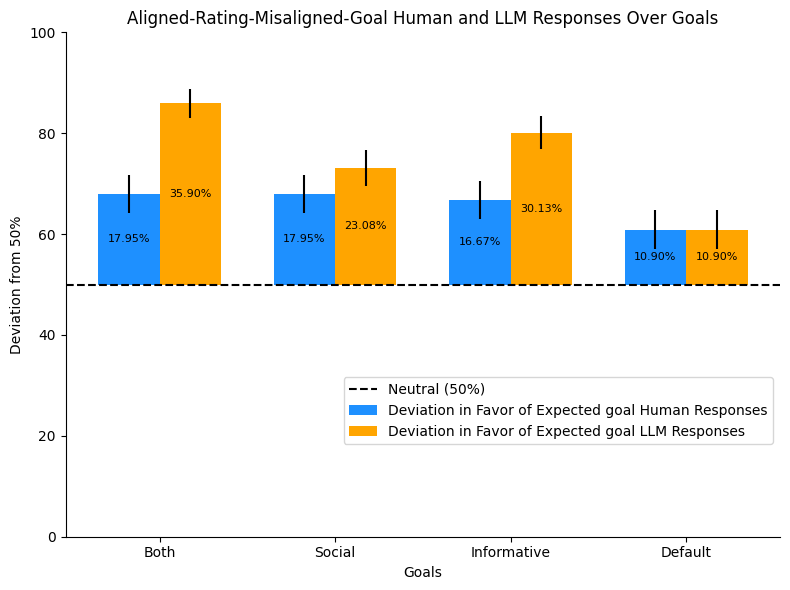

Plot saved to ./plots/Aligned_Goal_Misaligned_Rating_Human_and_LLM_Response_Over_Goals.pdf


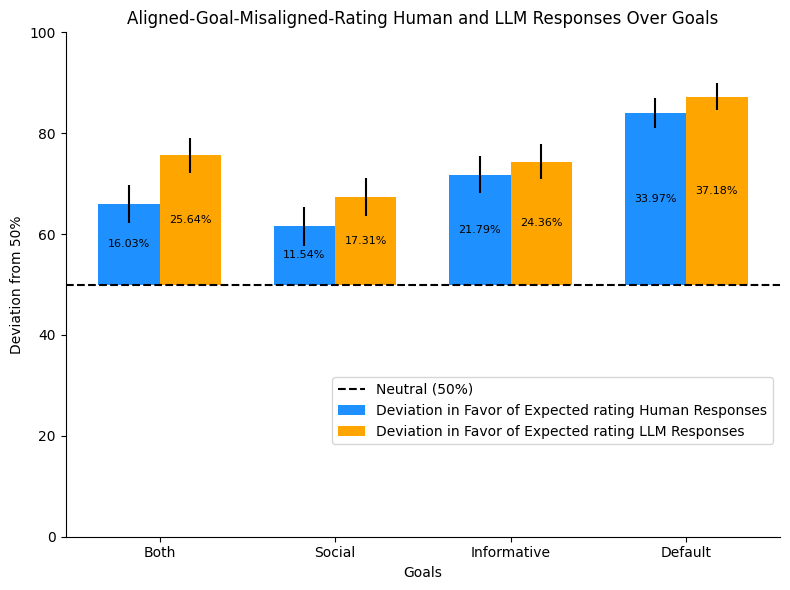

In [120]:
# Function to calculate standard deviation for binomial data
def calculate_sd(proportion, n):
    p = proportion / 100  # Convert percentage to proportion
    return np.sqrt(p * (1 - p) / n) * 100  # Multiply by 100 to convert back to percentage


# Updated function to handle two sets of ratings for each group
def plot_preference_with_two_ratings(groups, rating1_set1, rating2_set1, rating1_set2, rating2_set2, errors_set1, errors_set2,
                                     label1="Set 1 - Prefer Human", label2="Set 1 - Prefer LLM",
                                     label3="Set 2 - Prefer Human", label4="Set 2 - Prefer LLM",
                                     xlabel="Groups", ylabel="Deviation from 50%",
                                     title="Comparison of Preferences Across Two Sets",
                                     save_to_pdf=None):
    # Calculate deviation from the 50% baseline for both sets
    deviation_rating1_set1 = [50 - r for r in rating1_set1]
    deviation_rating2_set1 = [50 - r for r in rating2_set1]
    deviation_rating1_set2 = [50 - r for r in rating1_set2]
    deviation_rating2_set2 = [50 - r for r in rating2_set2]

    x = np.arange(len(groups))  # x positions for the groups
    width = 0.35  # Bar width

    fig, ax = plt.subplots(figsize=(8, 6))

    # Bars for Set 1 with SD-based error bars
    ax.bar(x - width / 2, deviation_rating2_set1, width, label=label2, color='dodgerblue', bottom=50, yerr=errors_set1, capsize=0)
    # ax.bar(x - width / 2, deviation_rating1_set1, width, label=label1, color='skyblue', bottom=50, yerr=errors_set1, capsize=0)

    # Bars for Set 2 with SD-based error bars
    ax.bar(x + width / 2, deviation_rating2_set2, width, label=label4, color='orange', bottom=50, yerr=errors_set2, capsize=0)
    # ax.bar(x + width / 2, deviation_rating1_set2, width, label=label3, color='gold', bottom=50, yerr=errors_set2, capsize=0)

    ax.set_ylim(0, 100)

    # Add horizontal dotted line at 50% for the baseline
    ax.axhline(y=50, color='black', linestyle='--', linewidth=1.5, label="Neutral (50%)")

    # Add labels, title, and legend
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(groups)
    ax.legend(loc='center right', bbox_to_anchor=(1, 0.25))

    # Annotate the bars with the deviation percentage for Set 1 and Set 2
    for i in range(len(groups)):
        if deviation_rating1_set1[i] != 0:
            ax.text(x[i] - width / 2, 50 - deviation_rating1_set1[i] / 2, f"{-deviation_rating1_set1[i]:.2f}%", 
                    ha='center', va='center', color='black', fontsize=8)
        if deviation_rating1_set2[i] != 0:
            ax.text(x[i] + width / 2, 50 - deviation_rating1_set2[i] / 2, f"{-deviation_rating1_set2[i]:.2f}%", 
                    ha='center', va='center', color='black', fontsize=8)

    # Customize the plot appearance
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Save the plot to a PDF if specified
    if save_to_pdf:
        plt.savefig(save_to_pdf, format='pdf', bbox_inches='tight')
        print(f"Plot saved to {save_to_pdf}")

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example data for the chart with two sets of ratings
n = 156  # Sample size
group_goals = ['Both', 'Social', 'Informative', 'Default']
group_ratings = ['0 hearts', '1 heart', '2 hearts', '3 hearts']

# Calculate SD-based errors for both sets
errors_set1 = [calculate_sd(r, n) for r in expected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list]
errors_set2 = [calculate_sd(r, n) for r in expected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list]

xlabel = "Goals"

aligned_rating_misaligned_goal_human_llm_response_over_goals_save_to_pdf = "./plots/Aligned_Rating_Misaligned_Goal_Human_and_LLM_Response_Over_Goals.pdf"


# Call the function to plot the chart with two sets of ratings
plot_preference_with_two_ratings(group_goals, expected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list, 
                                 unexpected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list, 
                                 expected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list, 
                                 unexpected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list, 
                                 errors_set1, errors_set2, xlabel = "Goals",
                                 label1="Deviation in Favor of Unexpected goal Human Responses", label2="Deviation in Favor of Expected goal Human Responses",
                                 label3="Deviation in Favor of Unexpected goal LLM responses", label4="Deviation in Favor of Expected goal LLM Responses",
                                 title="Aligned-Rating-Misaligned-Goal Human and LLM Responses Over Goals", save_to_pdf = aligned_rating_misaligned_goal_human_llm_response_over_goals_save_to_pdf)

errors_set1_aligned_goal_misaliged_rating_human_response = [calculate_sd(r, n) for r in expected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list]
errors_set1_aligned_goal_misaliged_rating_llm_response = [calculate_sd(r, n) for r in expected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list]

aligned_goal_misaligned_rating_human_llm_response_over_goals_save_to_pdf = "./plots/Aligned_Goal_Misaligned_Rating_Human_and_LLM_Response_Over_Goals.pdf"

plot_preference_with_two_ratings(group_goals, expected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list, 
                                 unexpected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list, 
                                 expected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list, 
                                 unexpected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list, 
                                 errors_set1_aligned_goal_misaliged_rating_human_response, 
                                 errors_set1_aligned_goal_misaliged_rating_llm_response, 
                                 xlabel = "Goals",
                                 label1="Deviation in Favor of Unexpected rating Human Responses", label2="Deviation in Favor of Expected rating Human Responses",
                                 label3="Deviation in Favor of Unexpected rating LLM responses", label4="Deviation in Favor of Expected rating LLM Responses",
                                 title="Aligned-Goal-Misaligned-Rating Human and LLM Responses Over Goals", save_to_pdf = aligned_goal_misaligned_rating_human_llm_response_over_goals_save_to_pdf)




Plot saved to ./plots/Aligned_Rating_Misaligned_Goal_Human_and_LLM_Response_Over_Goals.pdf


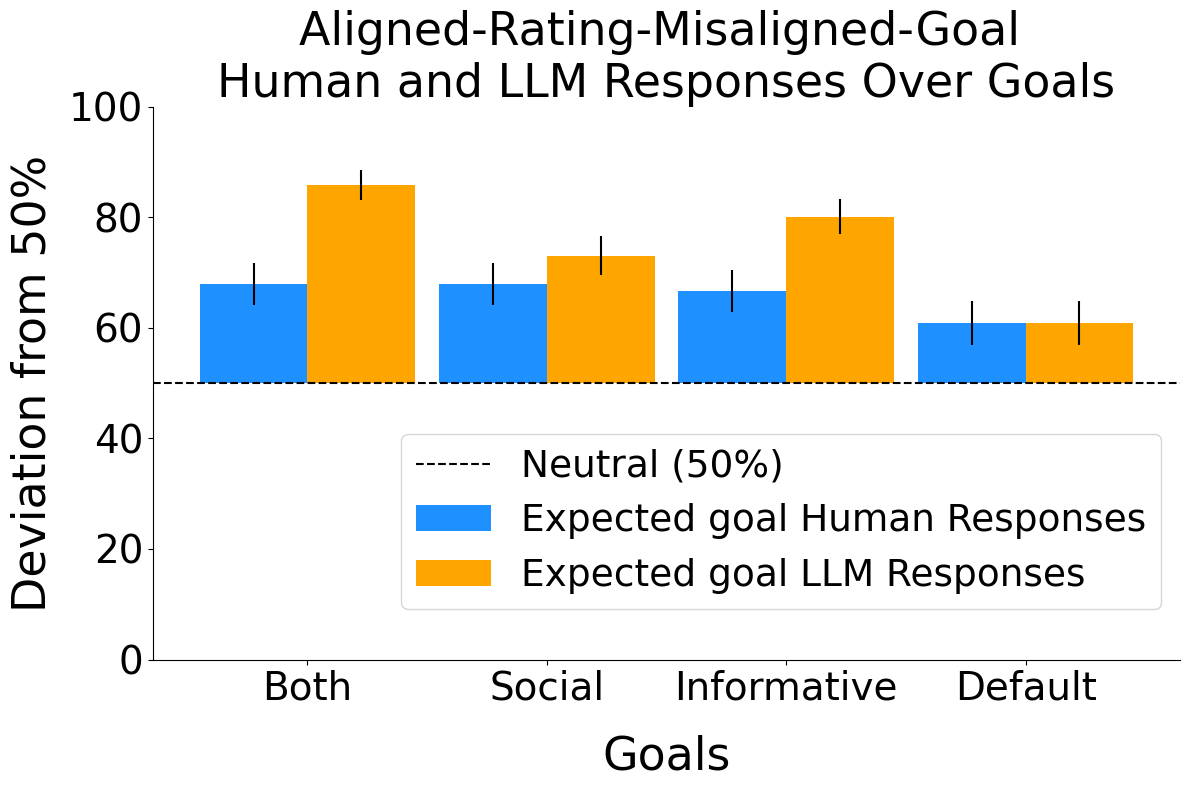

Plot saved to ./plots/Aligned_Goal_Misaligned_Rating_Human_and_LLM_Response_Over_Goals.pdf


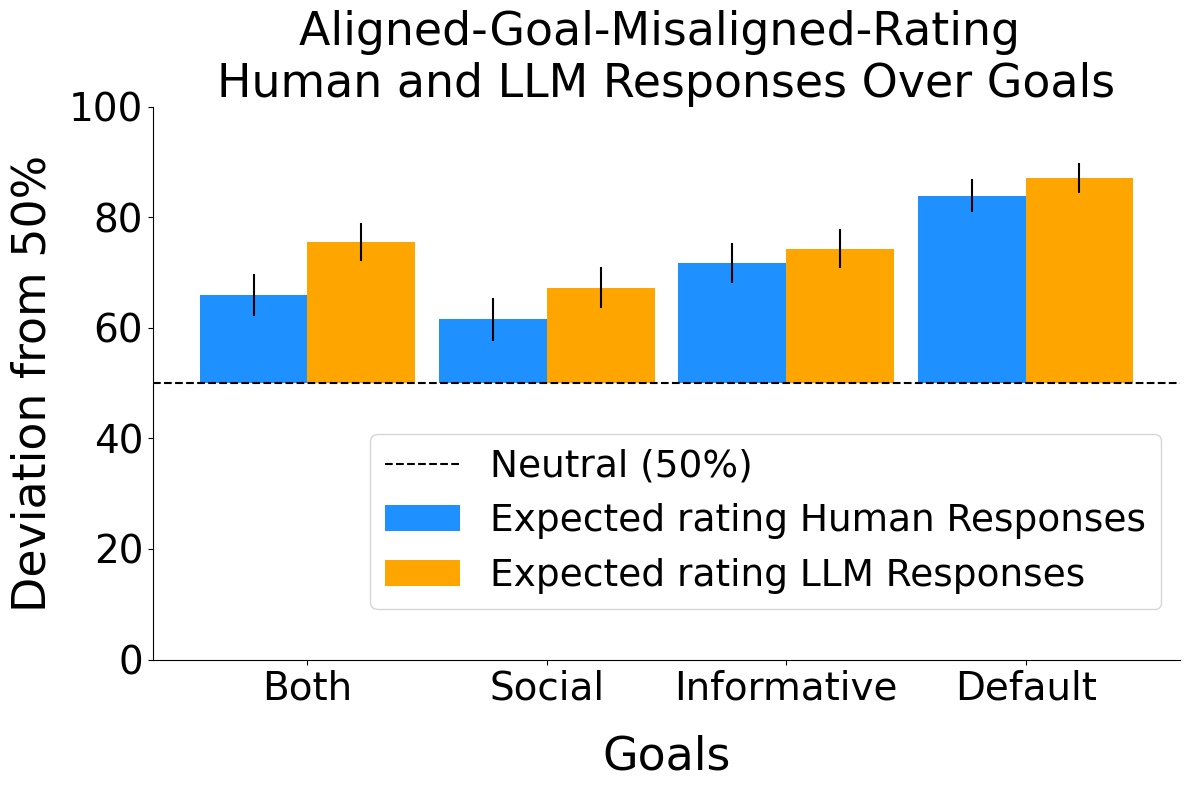

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Define font sizes for better readability
# TITLE_FONT_SIZE = 14
# LABEL_FONT_SIZE = 12
# TICK_FONT_SIZE = 10
# ANNOTATION_FONT_SIZE = 9
# LEGEND_FONT_SIZE = 11
# LEGEND_TITLE_FONT_SIZE = 10  # Smaller font size for legend title

# TITLE_FONT_SIZE = 20
# LABEL_FONT_SIZE = 18
# TICK_FONT_SIZE = 18
# ANNOTATION_FONT_SIZE = 15
# LEGEND_FONT_SIZE = 16

TITLE_FONT_SIZE = 33
LABEL_FONT_SIZE = 33
TICK_FONT_SIZE = 28
ANNOTATION_FONT_SIZE = 21
LEGEND_FONT_SIZE =27

# Updated function to handle two sets of ratings for each group
def plot_preference_with_two_ratings(groups, rating1_set1, rating2_set1, rating1_set2, rating2_set2, errors_set1, errors_set2,
                                     label1="Set 1 - Prefer Human", label2="Set 1 - Prefer LLM",
                                     label3="Set 2 - Prefer Human", label4="Set 2 - Prefer LLM",
                                     xlabel="Groups", ylabel="Deviation from 50%",
                                     title="Comparison of Preferences Across Two Sets",
                                     save_to_pdf=None):
    # Calculate deviation from the 50% baseline for both sets
    deviation_rating1_set1 = [50 - r for r in rating1_set1]
    deviation_rating2_set1 = [50 - r for r in rating2_set1]
    deviation_rating1_set2 = [50 - r for r in rating1_set2]
    deviation_rating2_set2 = [50 - r for r in rating2_set2]

    x = np.arange(len(groups))  # x positions for the groups
    width = 0.45  # Bar width

    fig, ax = plt.subplots(figsize=(12, 8))

    # Bars for Set 1 with SD-based error bars
    ax.bar(x - width / 2, deviation_rating2_set1, width, label=label2, color='dodgerblue', bottom=50, yerr=errors_set1, capsize=0)

    # Bars for Set 2 with SD-based error bars
    ax.bar(x + width / 2, deviation_rating2_set2, width, label=label4, color='orange', bottom=50, yerr=errors_set2, capsize=0)

    ax.set_ylim(0, 100)

    # Add horizontal dotted line at 50% for the baseline
    ax.axhline(y=50, color='black', linestyle='--', linewidth=1.5, label="Neutral (50%)")

    # Add labels, title, and legend
    ax.set_xlabel(xlabel, fontsize=LABEL_FONT_SIZE, labelpad=20)
    ax.set_ylabel(ylabel, fontsize=LABEL_FONT_SIZE, labelpad=10)
    ax.set_title(title, fontsize=TITLE_FONT_SIZE)
    ax.set_xticks(x)
    ax.set_xticklabels(groups, fontsize=TICK_FONT_SIZE)

    # y-axis ticks
    ax.tick_params(axis='y', labelsize=TICK_FONT_SIZE)

    # Adjust legend font size & legend title font size
    ax.legend(loc='center right', bbox_to_anchor=(1, 0.25), fontsize=LEGEND_FONT_SIZE)

    # # Annotate the bars with the deviation percentage for Set 1 and Set 2
    # for i in range(len(groups)):
    #     if deviation_rating1_set1[i] != 0:
    #         ax.text(x[i] - width / 2, 50 - deviation_rating1_set1[i] / 2, f"{-deviation_rating1_set1[i]:.2f}%", 
    #                 ha='center', va='center', color='black', fontsize=ANNOTATION_FONT_SIZE)
    #     if deviation_rating1_set2[i] != 0:
    #         ax.text(x[i] + width / 2, 50 - deviation_rating1_set2[i] / 2, f"{-deviation_rating1_set2[i]:.2f}%", 
    #                 ha='center', va='center', color='black', fontsize=ANNOTATION_FONT_SIZE)

    # Customize the plot appearance
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Save the plot to a PDF if specified
    if save_to_pdf:
        plt.savefig(save_to_pdf, format='pdf', bbox_inches='tight')
        print(f"Plot saved to {save_to_pdf}")

    # Show the plot
    plt.tight_layout()
    plt.show()



# Example data for the chart with two sets of ratings
n = 156  # Sample size

# Calculate SD-based errors for both sets
errors_set1 = [calculate_sd(r, n) for r in expected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list]
errors_set2 = [calculate_sd(r, n) for r in expected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list]

xlabel = "Goals"

aligned_rating_misaligned_goal_human_llm_response_over_goals_save_to_pdf = "./plots/Aligned_Rating_Misaligned_Goal_Human_and_LLM_Response_Over_Goals.pdf"


# Call the function to plot the chart with two sets of ratings
plot_preference_with_two_ratings(group_goals, expected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list, 
                                 unexpected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list, 
                                 expected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list, 
                                 unexpected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list, 
                                 errors_set1, errors_set2, xlabel = "Goals",
                                 label1="Deviation in Favor of Unexpected goal Human Responses", label2="Expected goal Human Responses",
                                 label3="Deviation in Favor of Unexpected goal LLM responses", label4="Expected goal LLM Responses",
                                 title="Aligned-Rating-Misaligned-Goal \nHuman and LLM Responses Over Goals", save_to_pdf = aligned_rating_misaligned_goal_human_llm_response_over_goals_save_to_pdf)

errors_set1_aligned_goal_misaliged_rating_human_response = [calculate_sd(r, n) for r in expected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list]
errors_set1_aligned_goal_misaliged_rating_llm_response = [calculate_sd(r, n) for r in expected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list]

aligned_goal_misaligned_rating_human_llm_response_over_goals_save_to_pdf = "./plots/Aligned_Goal_Misaligned_Rating_Human_and_LLM_Response_Over_Goals.pdf"

plot_preference_with_two_ratings(group_goals, expected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list, 
                                 unexpected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list, 
                                 expected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list, 
                                 unexpected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list, 
                                 errors_set1_aligned_goal_misaliged_rating_human_response, 
                                 errors_set1_aligned_goal_misaliged_rating_llm_response, 
                                 xlabel = "Goals",
                                 label1="Deviation in Favor of Unexpected rating Human Responses", label2="Expected rating Human Responses",
                                 label3="Deviation in Favor of Unexpected rating LLM responses", label4="Expected rating LLM Responses",
                                 title="Aligned-Goal-Misaligned-Rating \nHuman and LLM Responses Over Goals", save_to_pdf = aligned_goal_misaligned_rating_human_llm_response_over_goals_save_to_pdf)




Plot saved to ./plots/combined_plots_human_eval_over_goals.pdf


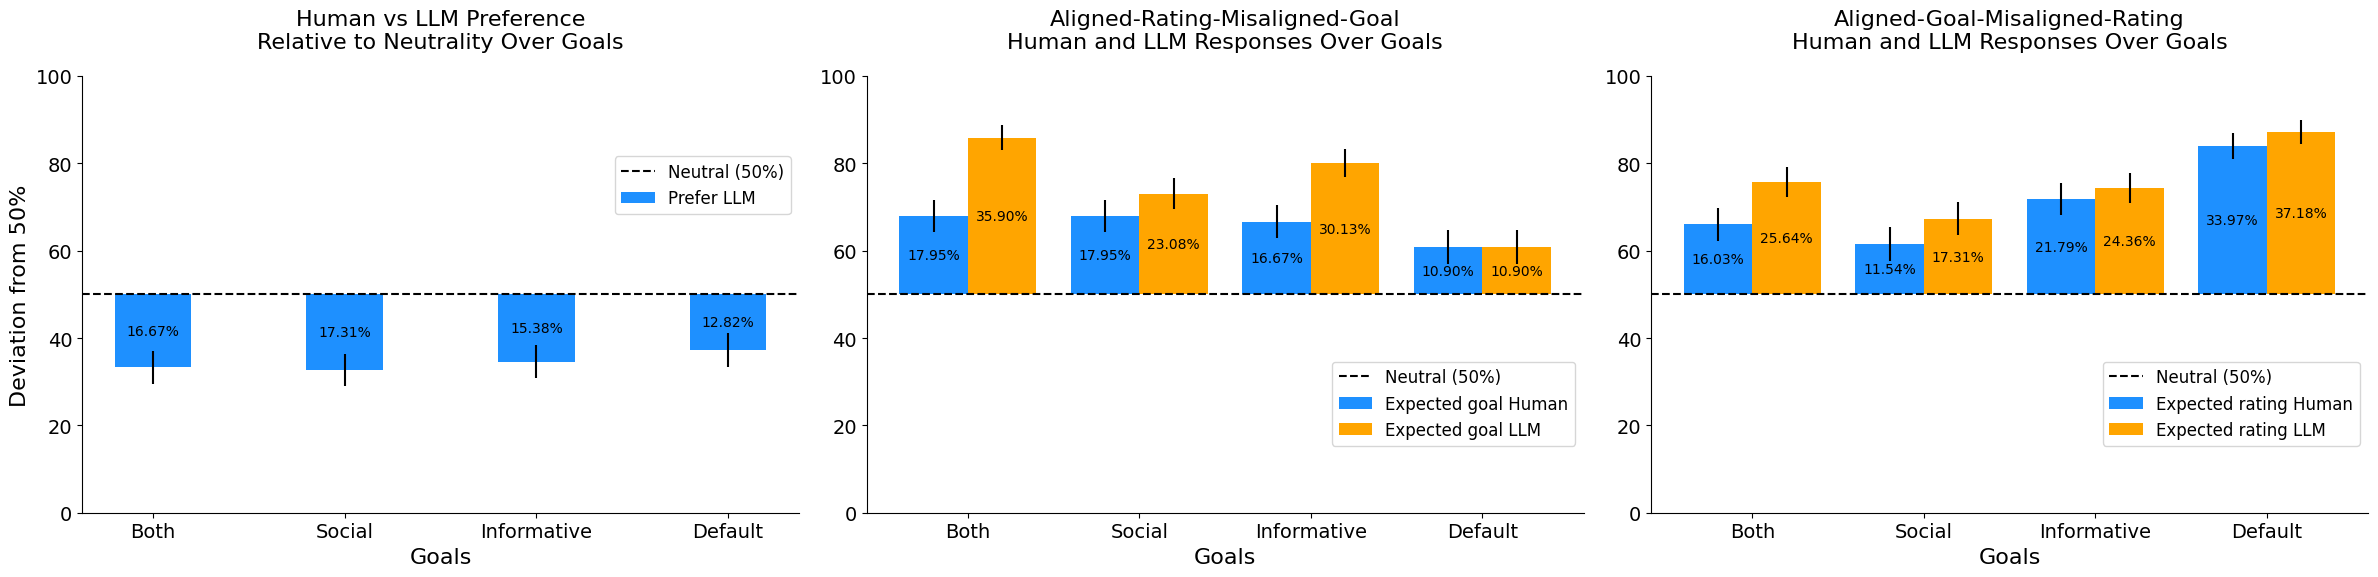

In [132]:
def create_three_subplots(groups, 
                         data1, data2, errors1,
                         data_set1_1, data_set1_2, data_set2_1, data_set2_2, errors_set1_1, errors_set1_2,
                         data_set2_1_2, data_set2_2_2, data_set2_3, data_set2_4, errors_set2_1, errors_set2_2,
                         save_to_pdf=None):
    
    plt.rcParams.update({'font.size': 14})  # Set base font size
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
    width = 0.40

    # First subplot
    x = np.arange(len(groups))
    deviation_rating1 = [50 - r for r in data1]
    deviation_rating2 = [50 - r for r in data2]
    
    ax1.bar(x, deviation_rating2, width, label="Prefer LLM", color='dodgerblue', bottom=50, yerr=errors1, capsize=0)
    # Annotate first subplot bars
    for i in range(len(groups)):
        if deviation_rating1[i] != 0:
            ax1.text(x[i], 50 - deviation_rating1[i]/2, f"{deviation_rating1[i]:.2f}%", 
                    ha='center', va='center', color='black', fontsize=10)

    ax1.set_ylim(0, 100)
    ax1.axhline(y=50, color='black', linestyle='--', linewidth=1.5, label="Neutral (50%)")
    ax1.set_xlabel("Goals", fontsize=16)
    ax1.set_ylabel("Deviation from 50%", fontsize=16)
    ax1.set_title("Human vs LLM Preference\nRelative to Neutrality Over Goals", fontsize=16, pad=20)
    ax1.set_xticks(x)
    ax1.set_xticklabels(groups, fontsize=14)
    ax1.tick_params(axis='y', labelsize=14)
    ax1.legend(loc='center right', bbox_to_anchor=(1, 0.75), fontsize=12)

    # Second subplot
    deviation_rating1_set1 = [50 - r for r in data_set1_1]
    deviation_rating2_set1 = [50 - r for r in data_set1_2]
    deviation_rating1_set2 = [50 - r for r in data_set2_1]
    deviation_rating2_set2 = [50 - r for r in data_set2_2]

    ax2.bar(x - width/2, deviation_rating2_set1, width, label="Expected goal Human", color='dodgerblue', bottom=50, yerr=errors_set1_1, capsize=0)
    ax2.bar(x + width/2, deviation_rating2_set2, width, label="Expected goal LLM", color='orange', bottom=50, yerr=errors_set1_2, capsize=0)
    # Annotate second subplot bars
    for i in range(len(groups)):
        if deviation_rating1_set1[i] != 0:
            ax2.text(x[i] - width/2, 50 - deviation_rating1_set1[i]/2, f"{-deviation_rating1_set1[i]:.2f}%", 
                    ha='center', va='center', color='black', fontsize=10)
        if deviation_rating1_set2[i] != 0:
            ax2.text(x[i] + width/2, 50 - deviation_rating1_set2[i]/2, f"{-deviation_rating1_set2[i]:.2f}%", 
                    ha='center', va='center', color='black', fontsize=10)

    ax2.set_ylim(0, 100)
    ax2.axhline(y=50, color='black', linestyle='--', linewidth=1.5, label="Neutral (50%)")
    ax2.set_xlabel("Goals", fontsize=16)
    ax2.set_title("Aligned-Rating-Misaligned-Goal\nHuman and LLM Responses Over Goals", fontsize=16, pad=20)
    ax2.set_xticks(x)
    ax2.set_xticklabels(groups, fontsize=14)
    ax2.tick_params(axis='y', labelsize=14)
    ax2.legend(loc='center right', bbox_to_anchor=(1, 0.25), fontsize=12)

    # Third subplot
    deviation_rating1_set1_2 = [50 - r for r in data_set2_1_2]
    deviation_rating2_set1_2 = [50 - r for r in data_set2_2_2]
    deviation_rating1_set2_2 = [50 - r for r in data_set2_3]
    deviation_rating2_set2_2 = [50 - r for r in data_set2_4]

    ax3.bar(x - width/2, deviation_rating2_set1_2, width, label="Expected rating Human", color='dodgerblue', bottom=50, yerr=errors_set2_1, capsize=0)
    ax3.bar(x + width/2, deviation_rating2_set2_2, width, label="Expected rating LLM", color='orange', bottom=50, yerr=errors_set2_2, capsize=0)
    # Annotate third subplot bars
    for i in range(len(groups)):
        if deviation_rating1_set1_2[i] != 0:
            ax3.text(x[i] - width/2, 50 - deviation_rating1_set1_2[i]/2, f"{-deviation_rating1_set1_2[i]:.2f}%", 
                    ha='center', va='center', color='black', fontsize=10)
        if deviation_rating1_set2_2[i] != 0:
            ax3.text(x[i] + width/2, 50 - deviation_rating1_set2_2[i]/2, f"{-deviation_rating1_set2_2[i]:.2f}%", 
                    ha='center', va='center', color='black', fontsize=10)

    ax3.set_ylim(0, 100)
    ax3.axhline(y=50, color='black', linestyle='--', linewidth=1.5, label="Neutral (50%)")
    ax3.set_xlabel("Goals", fontsize=16)
    ax3.set_title("Aligned-Goal-Misaligned-Rating\nHuman and LLM Responses Over Goals", fontsize=16, pad=20)
    ax3.set_xticks(x)
    ax3.set_xticklabels(groups, fontsize=14)
    ax3.tick_params(axis='y', labelsize=14)
    ax3.legend(loc='center right', bbox_to_anchor=(1, 0.25), fontsize=12)

    # Remove top and right spines for all subplots
    for ax in [ax1, ax2, ax3]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    plt.tight_layout()
    
    if save_to_pdf:
        plt.savefig(save_to_pdf, format='pdf', bbox_inches='tight')
        print(f"Plot saved to {save_to_pdf}")
    
    plt.show()


rating1 = [33.33, 32.69, 34.62, 37.18]  # Prefer Human
rating2 = [66.67, 67.31, 65.38, 62.82]  # Prefer LLM
errors = [calculate_sd(r, n) for r in rating2]

create_three_subplots(
    group_goals,
    # Data for first subplot
    rating1, rating2, errors,
    # Data for second subplot
    expected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list,
    unexpected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list,
    expected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list,
    unexpected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list,
    errors_set1, errors_set2,
    # Data for third subplot
    expected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list,
    unexpected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list,
    expected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list,
    unexpected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list,
    errors_set1_aligned_goal_misaliged_rating_human_response,
    errors_set1_aligned_goal_misaliged_rating_llm_response,
    save_to_pdf="./plots/combined_plots_human_eval_over_goals.pdf"
)

Plot saved to ./plots/combined_plots_human_eval_over_goals.pdf


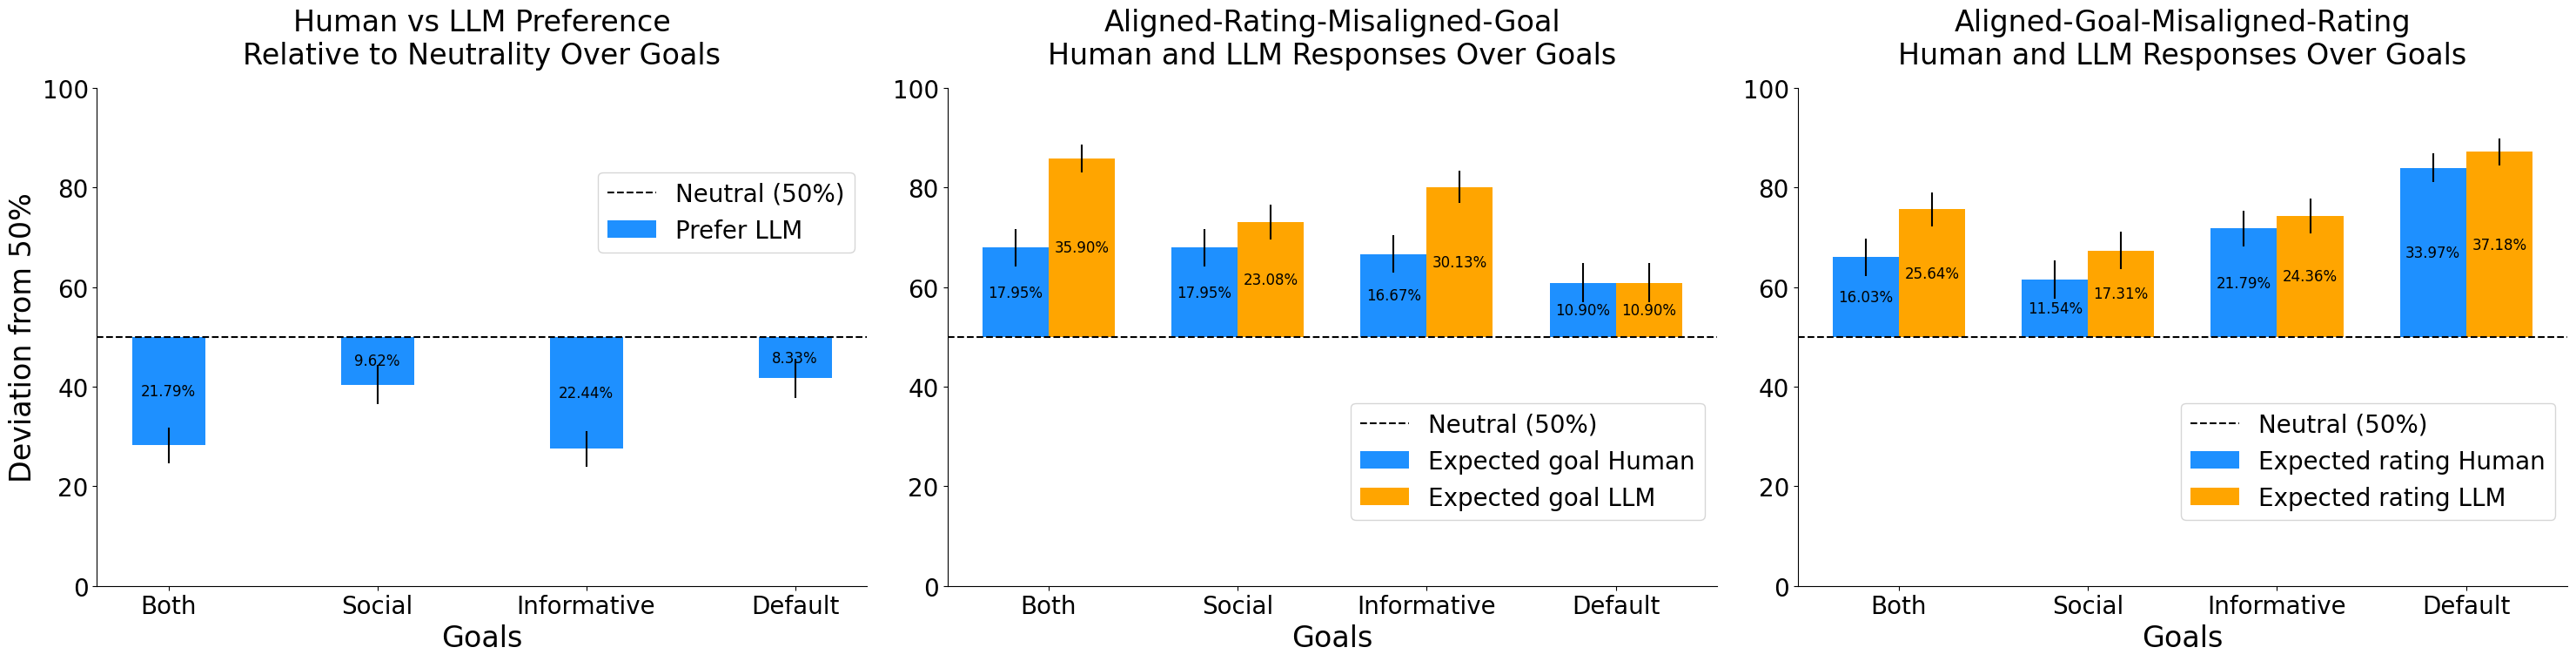

In [97]:
def create_three_subplots(groups, 
                         data1, data2, errors1,
                         data_set1_1, data_set1_2, data_set2_1, data_set2_2, errors_set1_1, errors_set1_2,
                         data_set2_1_2, data_set2_2_2, data_set2_3, data_set2_4, errors_set2_1, errors_set2_2,
                         save_to_pdf=None):
    
    plt.rcParams.update({'font.size': 20})  # Set base font size
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 8))
    width = 0.35

    # First subplot
    x = np.arange(len(groups))
    deviation_rating1 = [50 - r for r in data1]
    deviation_rating2 = [50 - r for r in data2]
    
    ax1.bar(x, deviation_rating2, width, label="Prefer LLM", color='dodgerblue', bottom=50, yerr=errors1, capsize=0)
    # Annotate first subplot bars
    for i in range(len(groups)):
        if deviation_rating1[i] != 0:
            ax1.text(x[i], 50 - deviation_rating1[i]/2, f"{deviation_rating1[i]:.2f}%", 
                    ha='center', va='center', color='black', fontsize=12)

    ax1.set_ylim(0, 100)
    ax1.axhline(y=50, color='black', linestyle='--', linewidth=1.5, label="Neutral (50%)")
    ax1.set_xlabel("Goals", fontsize=24)
    ax1.set_ylabel("Deviation from 50%", fontsize=24)
    ax1.set_title("Human vs LLM Preference\nRelative to Neutrality Over Goals", fontsize=24, pad=20)
    ax1.set_xticks(x)
    ax1.set_xticklabels(groups, fontsize=20)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.legend(loc='center right', bbox_to_anchor=(1, 0.75), fontsize=20)

    # Second subplot
    deviation_rating1_set1 = [50 - r for r in data_set1_1]
    deviation_rating2_set1 = [50 - r for r in data_set1_2]
    deviation_rating1_set2 = [50 - r for r in data_set2_1]
    deviation_rating2_set2 = [50 - r for r in data_set2_2]

    ax2.bar(x - width/2, deviation_rating2_set1, width, label="Expected goal Human", color='dodgerblue', bottom=50, yerr=errors_set1_1, capsize=0)
    ax2.bar(x + width/2, deviation_rating2_set2, width, label="Expected goal LLM", color='orange', bottom=50, yerr=errors_set1_2, capsize=0)
    # Annotate second subplot bars
    for i in range(len(groups)):
        if deviation_rating1_set1[i] != 0:
            ax2.text(x[i] - width/2, 50 - deviation_rating1_set1[i]/2, f"{-deviation_rating1_set1[i]:.2f}%", 
                    ha='center', va='center', color='black', fontsize=12)
        if deviation_rating1_set2[i] != 0:
            ax2.text(x[i] + width/2, 50 - deviation_rating1_set2[i]/2, f"{-deviation_rating1_set2[i]:.2f}%", 
                    ha='center', va='center', color='black', fontsize=12)

    ax2.set_ylim(0, 100)
    ax2.axhline(y=50, color='black', linestyle='--', linewidth=1.5, label="Neutral (50%)")
    ax2.set_xlabel("Goals", fontsize=24)
    ax2.set_title("Aligned-Rating-Misaligned-Goal\nHuman and LLM Responses Over Goals", fontsize=24, pad=20)
    ax2.set_xticks(x)
    ax2.set_xticklabels(groups, fontsize=20)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.legend(loc='center right', bbox_to_anchor=(1, 0.25), fontsize=20)

    # Third subplot
    deviation_rating1_set1_2 = [50 - r for r in data_set2_1_2]
    deviation_rating2_set1_2 = [50 - r for r in data_set2_2_2]
    deviation_rating1_set2_2 = [50 - r for r in data_set2_3]
    deviation_rating2_set2_2 = [50 - r for r in data_set2_4]

    ax3.bar(x - width/2, deviation_rating2_set1_2, width, label="Expected rating Human", color='dodgerblue', bottom=50, yerr=errors_set2_1, capsize=0)
    ax3.bar(x + width/2, deviation_rating2_set2_2, width, label="Expected rating LLM", color='orange', bottom=50, yerr=errors_set2_2, capsize=0)
    # Annotate third subplot bars
    for i in range(len(groups)):
        if deviation_rating1_set1_2[i] != 0:
            ax3.text(x[i] - width/2, 50 - deviation_rating1_set1_2[i]/2, f"{-deviation_rating1_set1_2[i]:.2f}%", 
                    ha='center', va='center', color='black', fontsize=12)
        if deviation_rating1_set2_2[i] != 0:
            ax3.text(x[i] + width/2, 50 - deviation_rating1_set2_2[i]/2, f"{-deviation_rating1_set2_2[i]:.2f}%", 
                    ha='center', va='center', color='black', fontsize=12)

    ax3.set_ylim(0, 100)
    ax3.axhline(y=50, color='black', linestyle='--', linewidth=1.5, label="Neutral (50%)")
    ax3.set_xlabel("Goals", fontsize=24)
    ax3.set_title("Aligned-Goal-Misaligned-Rating\nHuman and LLM Responses Over Goals", fontsize=24, pad=20)
    ax3.set_xticks(x)
    ax3.set_xticklabels(groups, fontsize=20)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.legend(loc='center right', bbox_to_anchor=(1, 0.25), fontsize=20)

    # Remove top and right spines for all subplots
    for ax in [ax1, ax2, ax3]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    plt.tight_layout()
    
    if save_to_pdf:
        plt.savefig(save_to_pdf, format='pdf', bbox_inches='tight')
        print(f"Plot saved to {save_to_pdf}")
    
    plt.show()

create_three_subplots(
    group_goals,
    # Data for first subplot
    rating1, rating2, errors,
    # Data for second subplot
    expected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list,
    unexpected_aligned_rating_misaligned_goal_human_response_comparison_with_respect_to_goals_list,
    expected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list,
    unexpected_aligned_rating_misaligned_goal_llm_response_comparison_with_respect_to_goals_list,
    errors_set1, errors_set2,
    # Data for third subplot
    expected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list,
    unexpected_aligned_goal_misaligned_rating_human_response_comparison_with_respect_to_goals_list,
    expected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list,
    unexpected_aligned_goal_misaligned_rating_llm_response_comparison_with_respect_to_goals_list,
    errors_set1_aligned_goal_misaliged_rating_human_response,
    errors_set1_aligned_goal_misaliged_rating_llm_response,
    save_to_pdf="./plots/combined_plots_human_eval_over_goals.pdf"
)